# Breast cancer prediction with decision tree model

## Imports

In [15]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

## Data understanding and preparation

Dataset contains of features computed from digitalized image of a fine needle aspirate (FNA) of a breast mass. Each parameter have three variations: mean, standard error, worst (mean of three largest values). It results in 30 attributes for each of 569 instances. There are 357 benign cases and 212 malignant. 

Ten real-valued features are computed for each cell nucleus:

-radius (mean of distances from center to points on the perimeter) <br>
-texture (standard deviation of gray-scale values) <br>
-perimeter <br>
-area <br>
-smoothness (local variation in radius lengths) <br>
-compactness (perimeter^2 / area - 1.0) <br>
-concavity (severity of concave portions of the contour) <br>
-concave points (number of concave portions of the contour) <br>
-symmetry <br>
-fractal dimension ("coastline approximation" - 1) <br>

In [16]:
tumor = pd.read_csv('./tumor/wbdc.csv')
tumor.info()
rnd=101

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
tumor.drop(['id','Unnamed: 32'], 1, inplace=True)
tumor.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


                                             |                                             | [  0%]   00:00 ->…


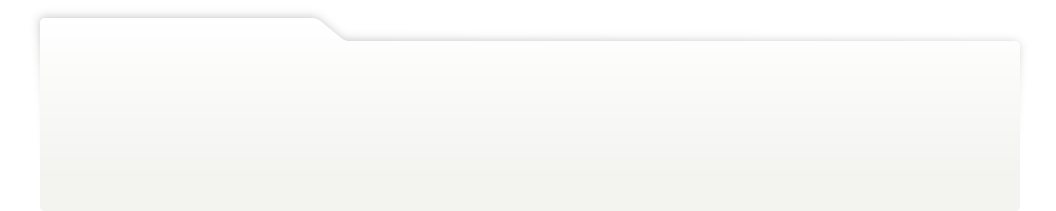
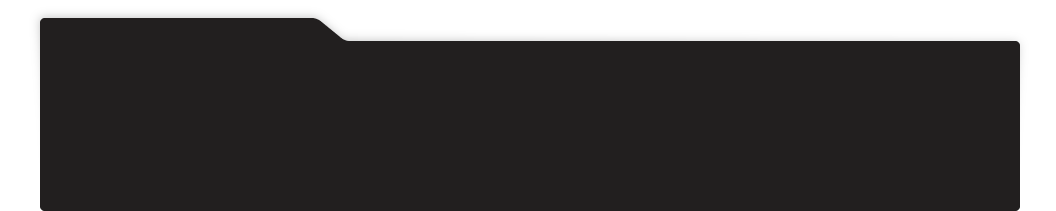
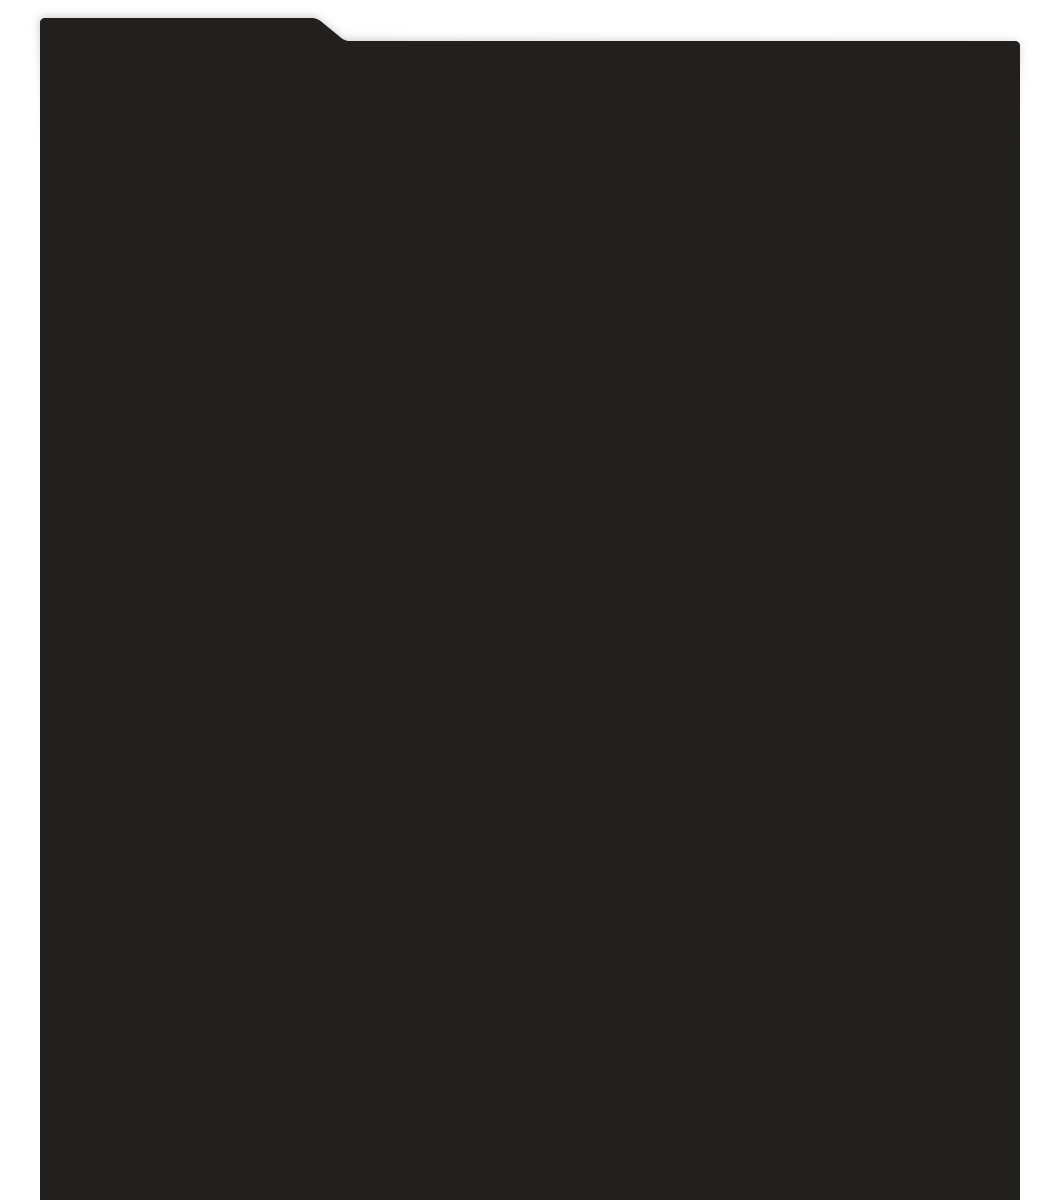
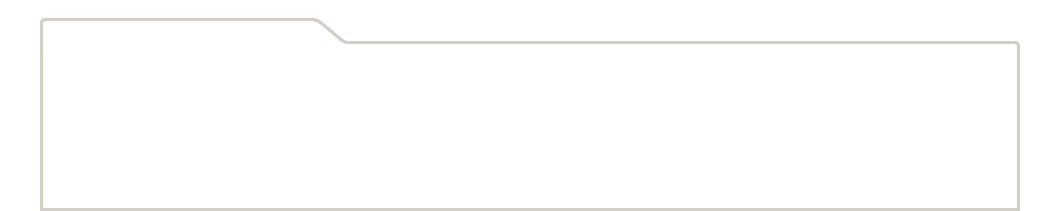
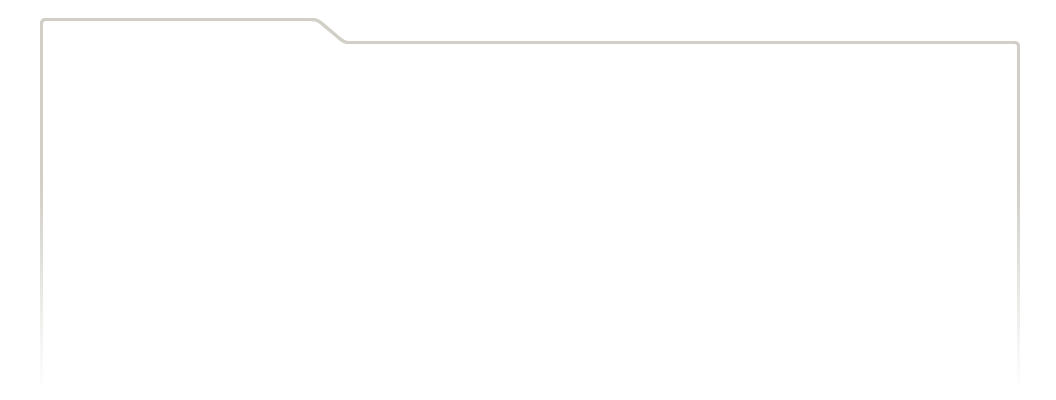
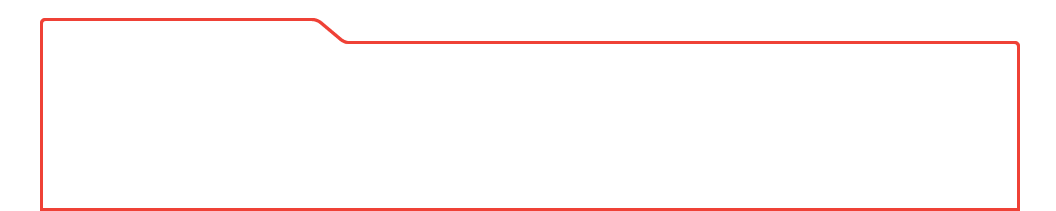
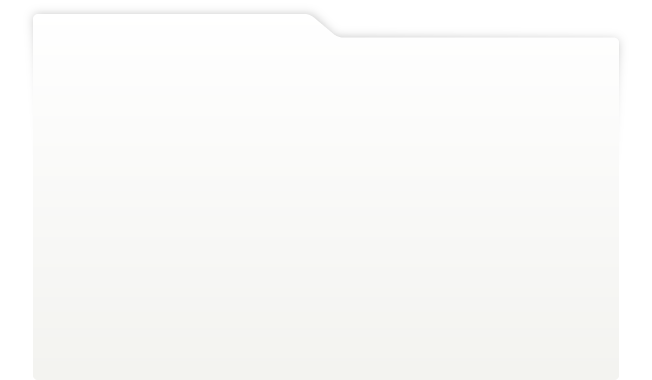
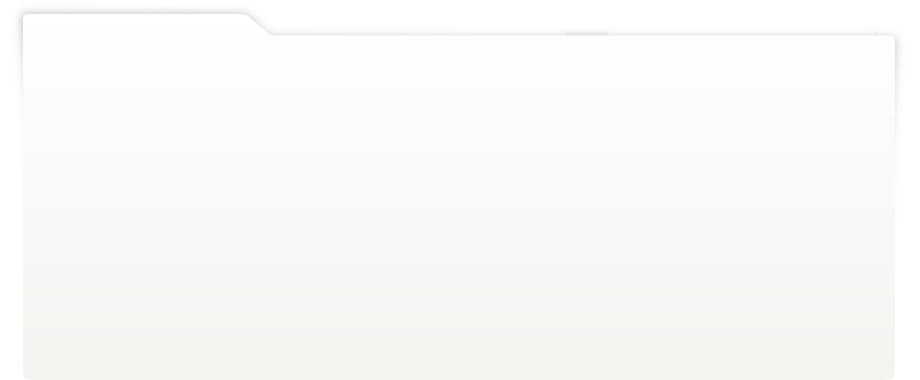
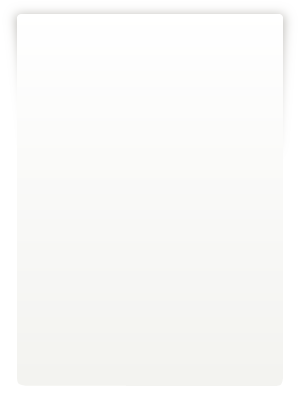
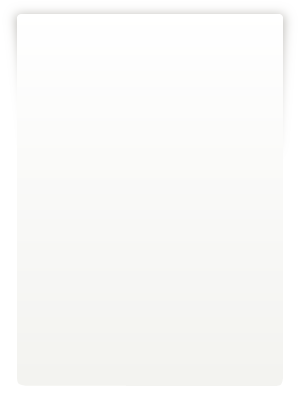
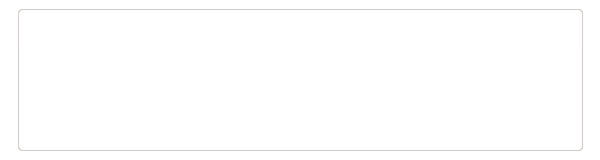
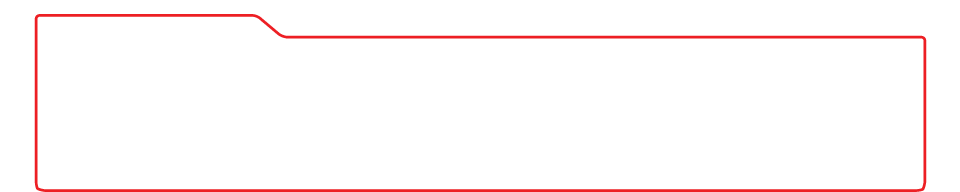
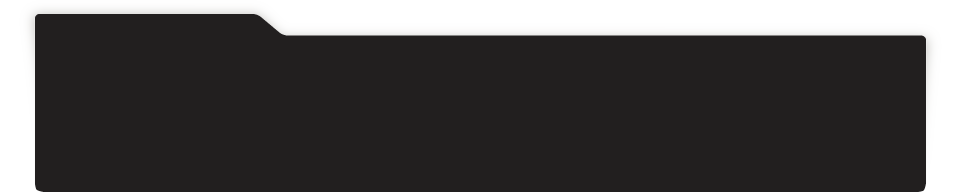
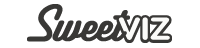
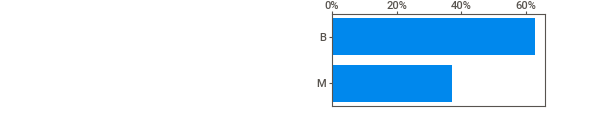
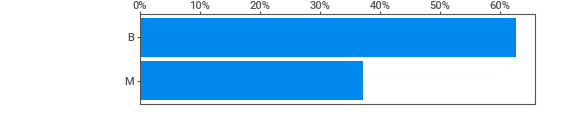
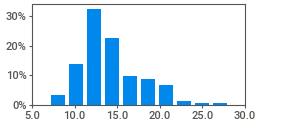
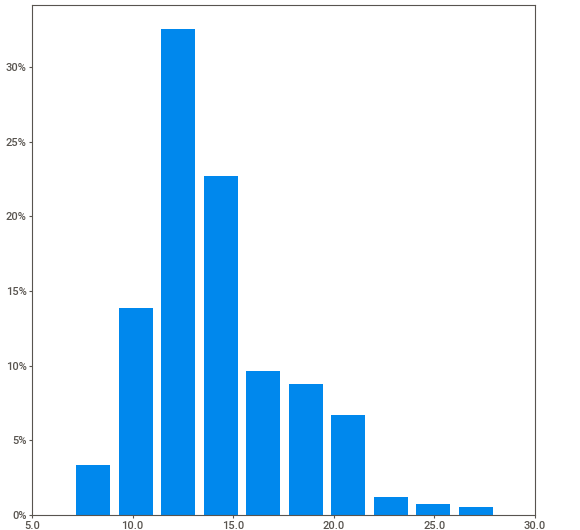
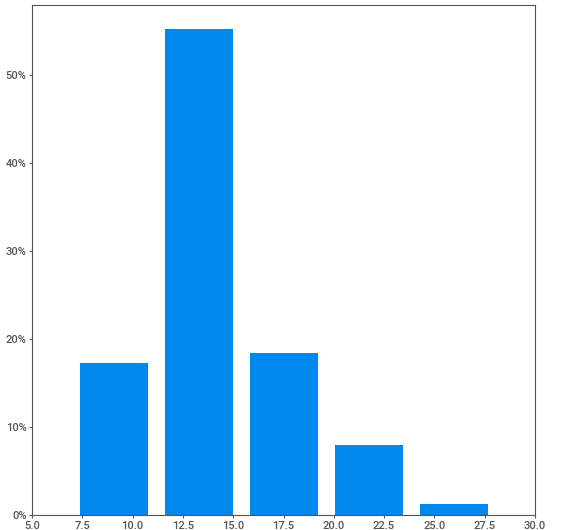
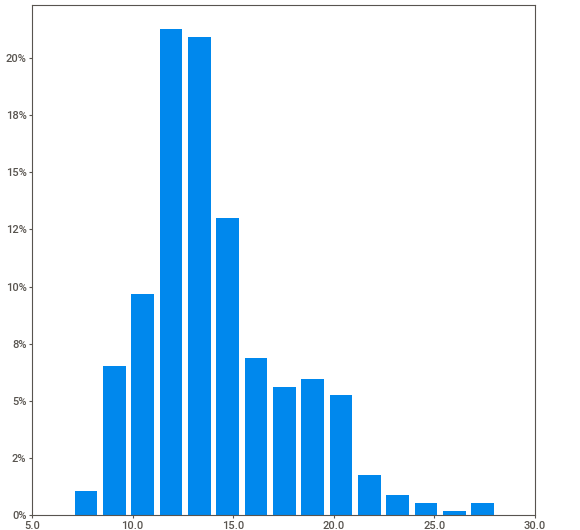
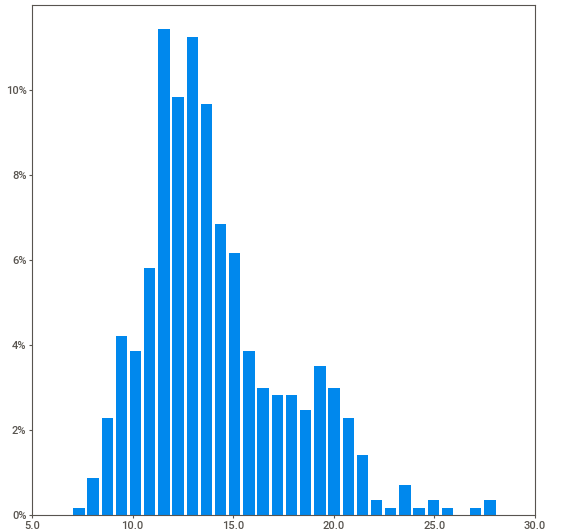
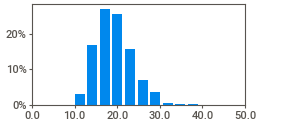
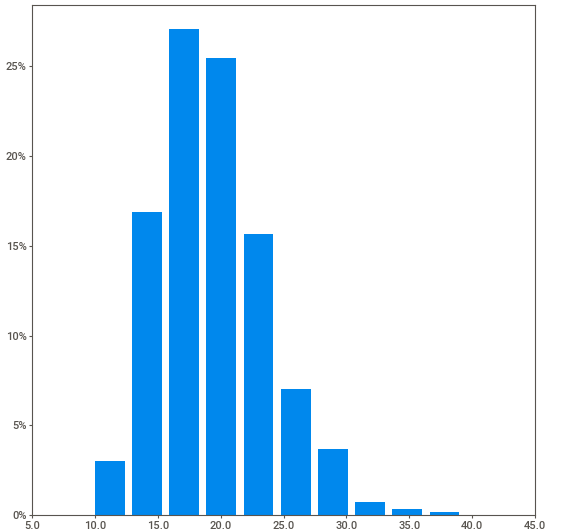
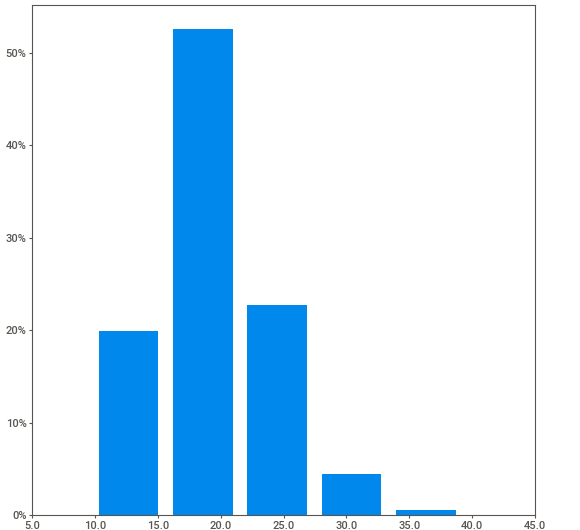
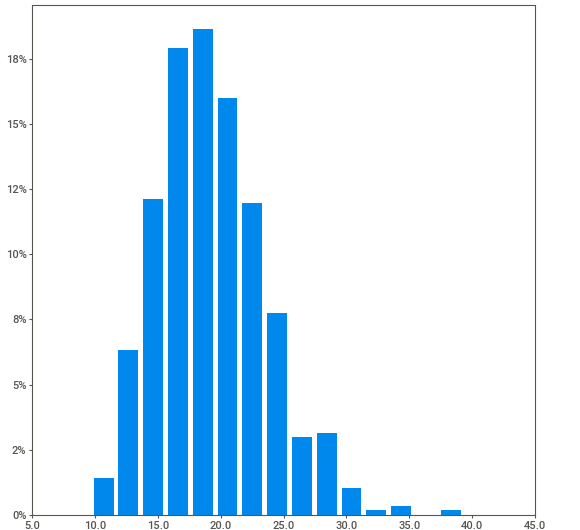
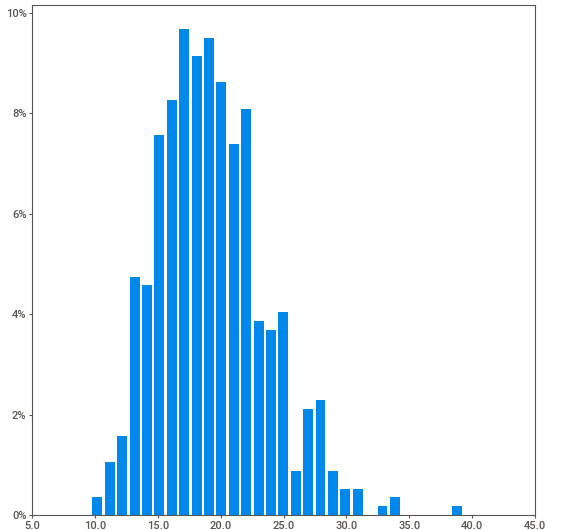
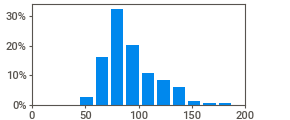
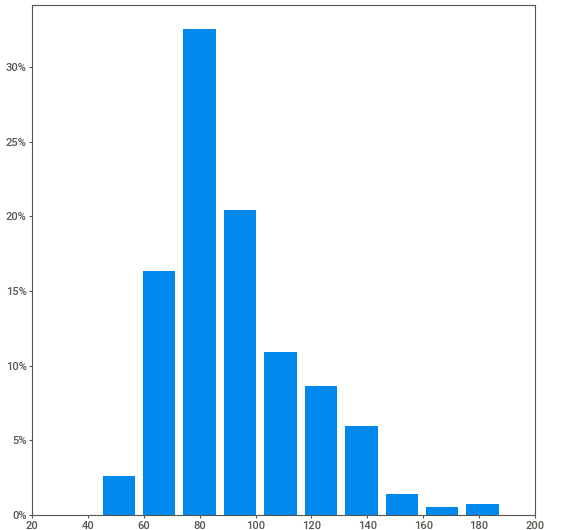
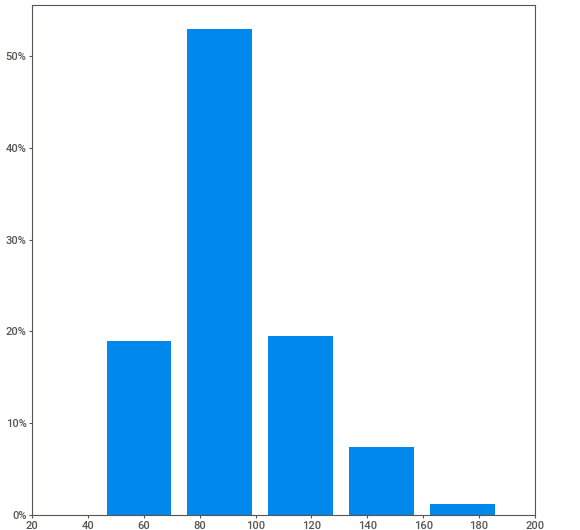
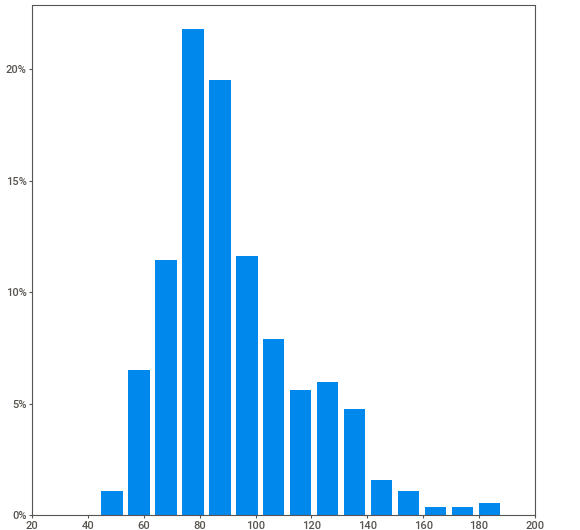
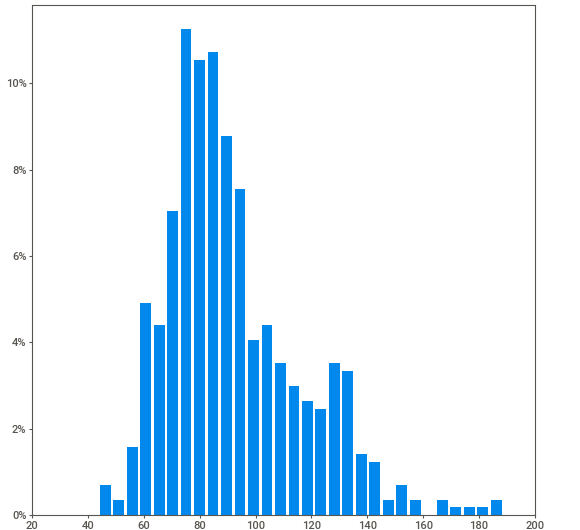
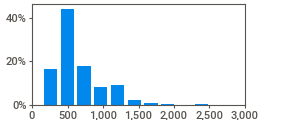
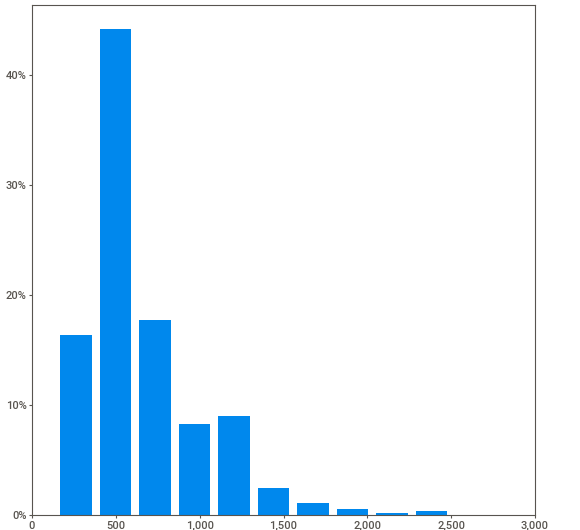
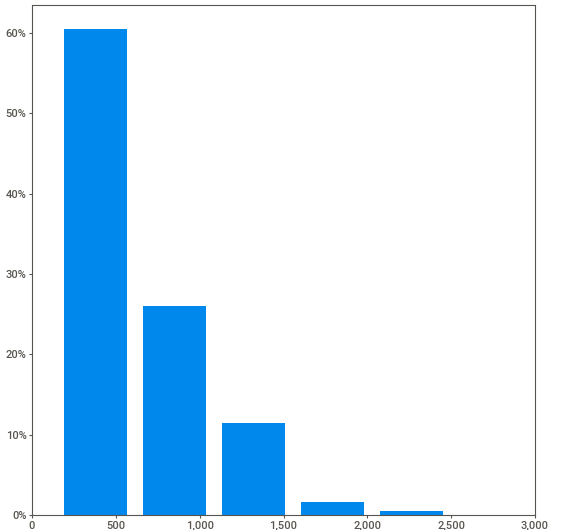
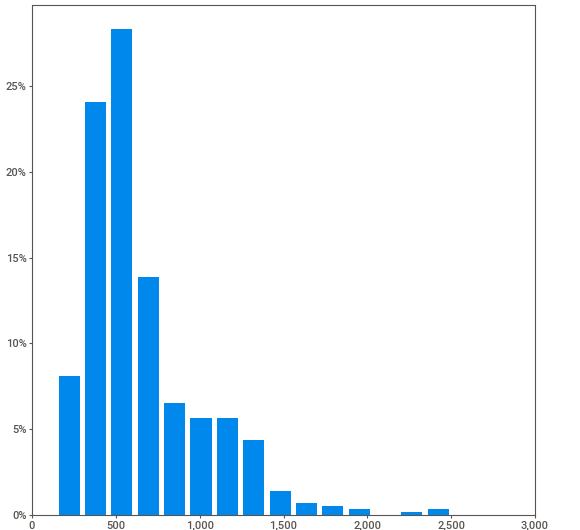
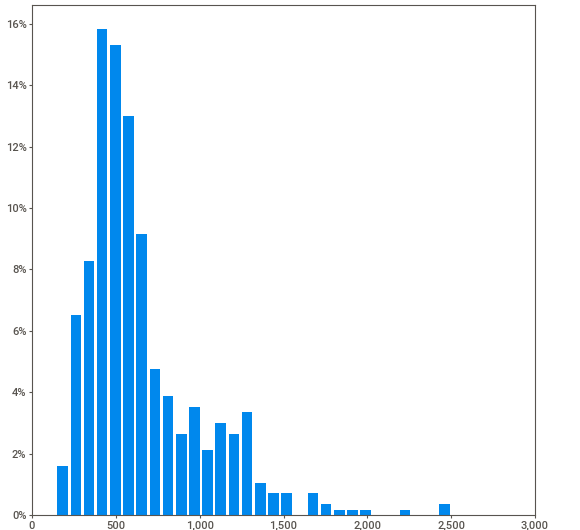
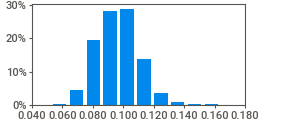
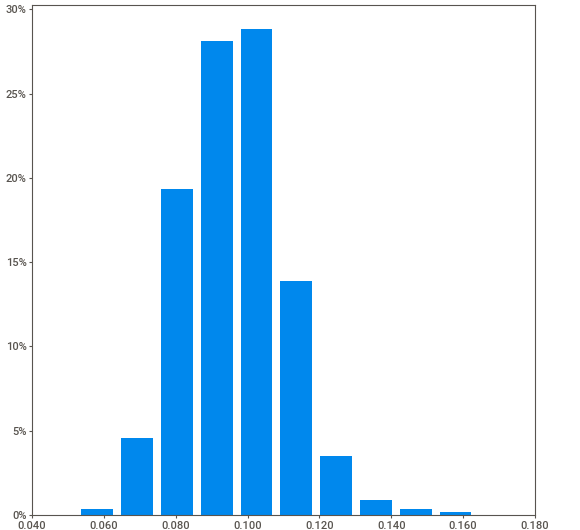
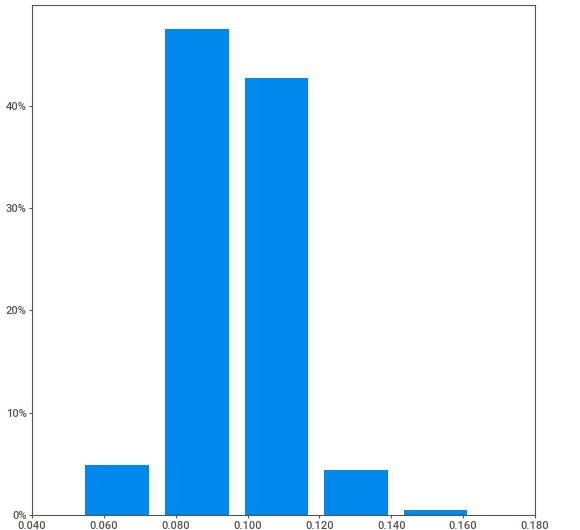
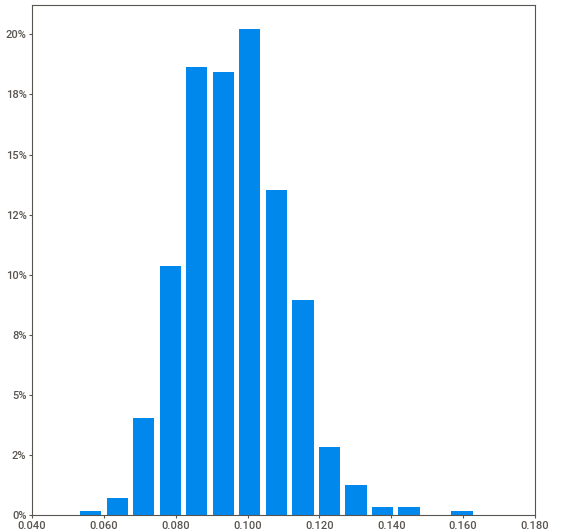
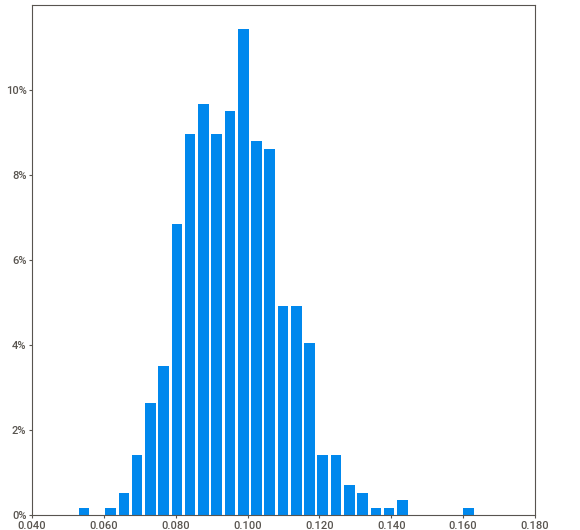
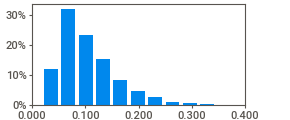
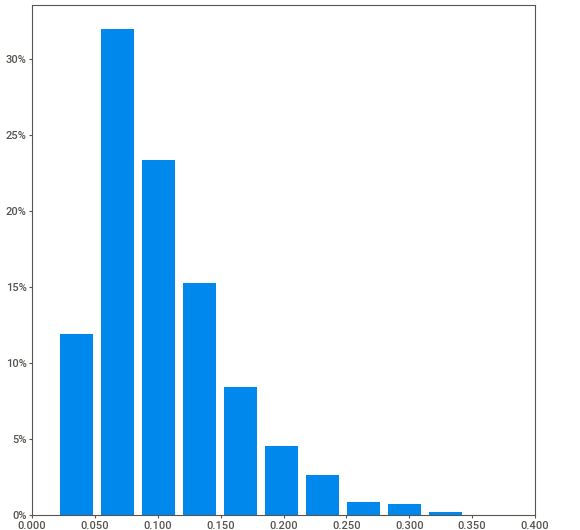
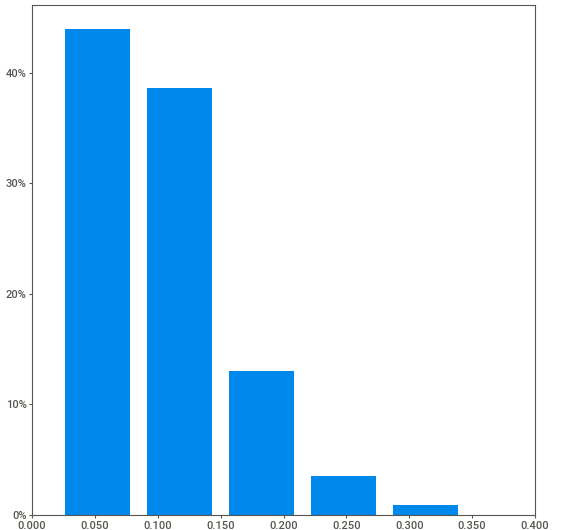
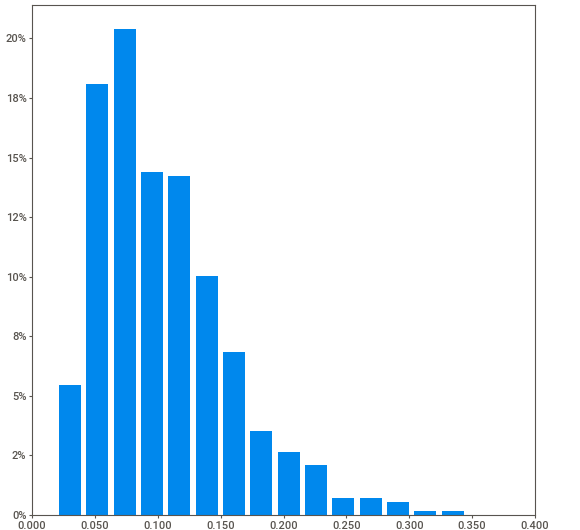
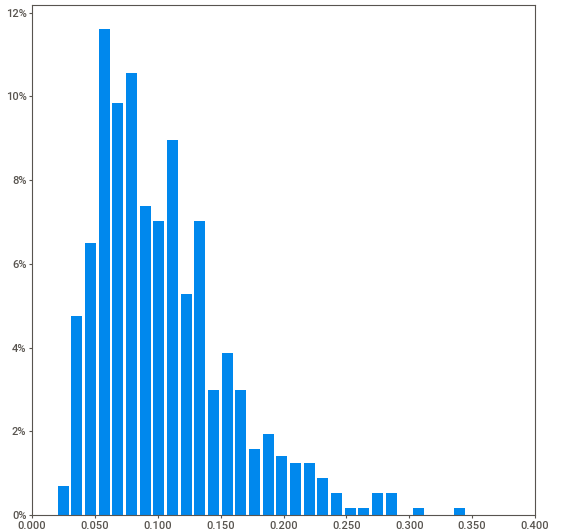
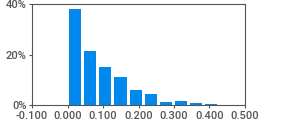
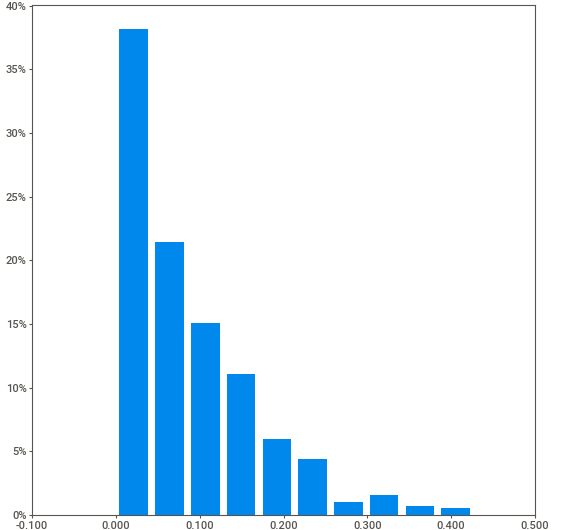
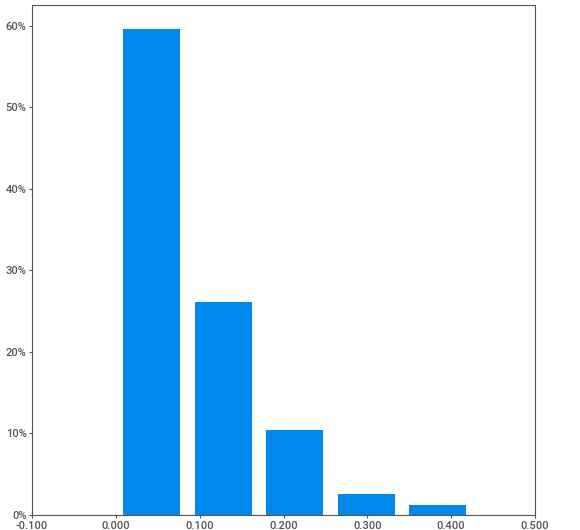
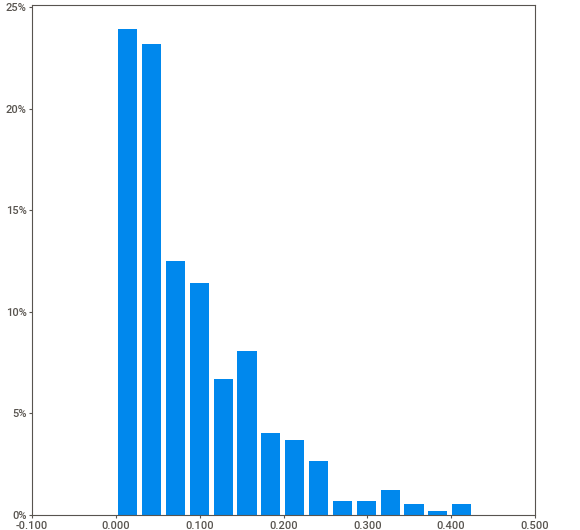
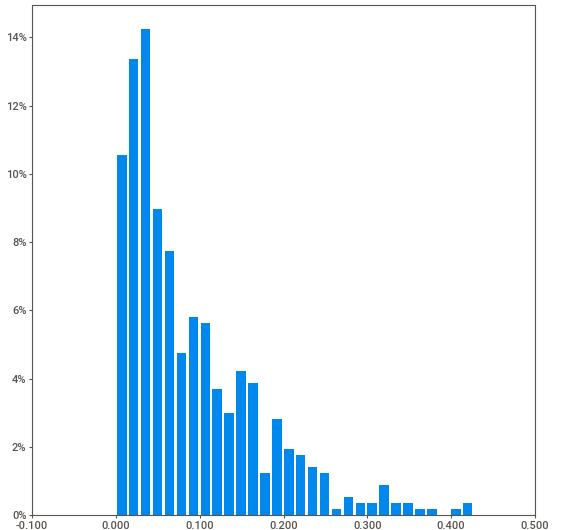
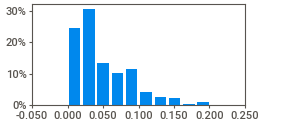
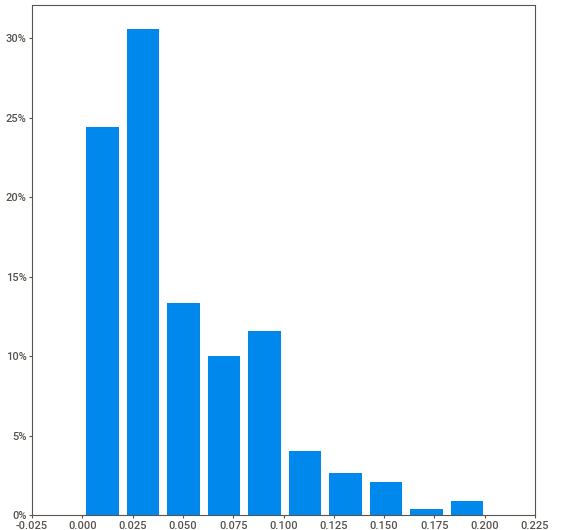
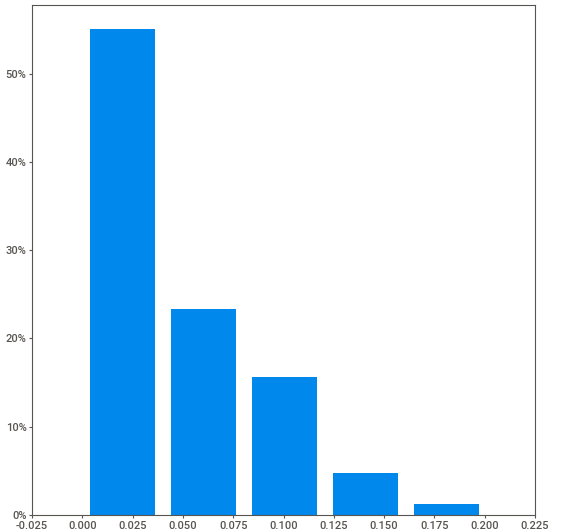
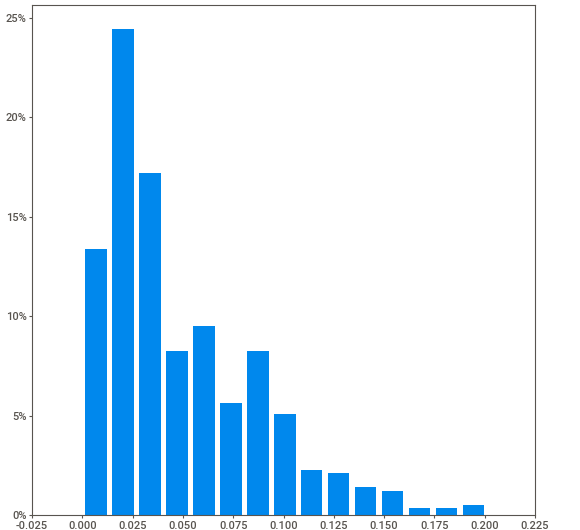
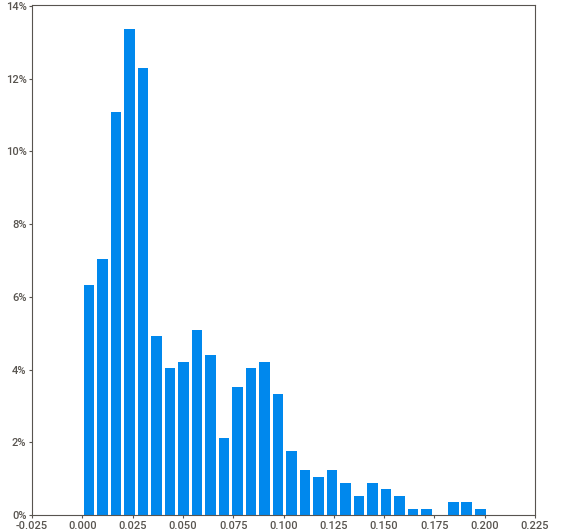
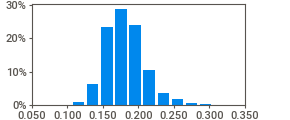
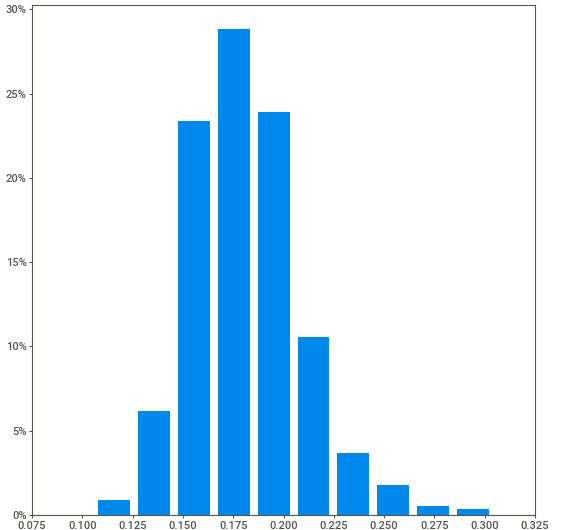
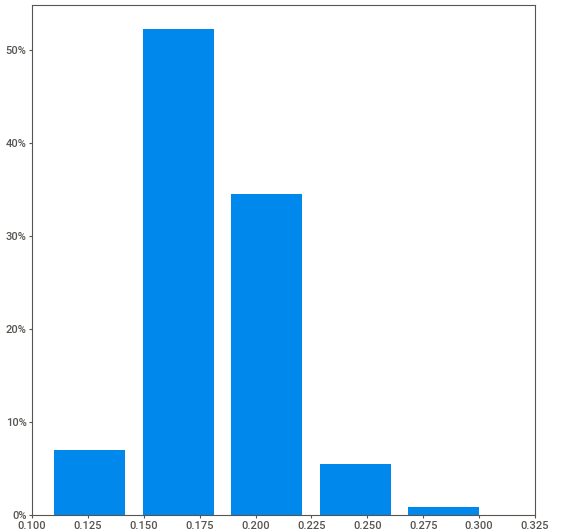
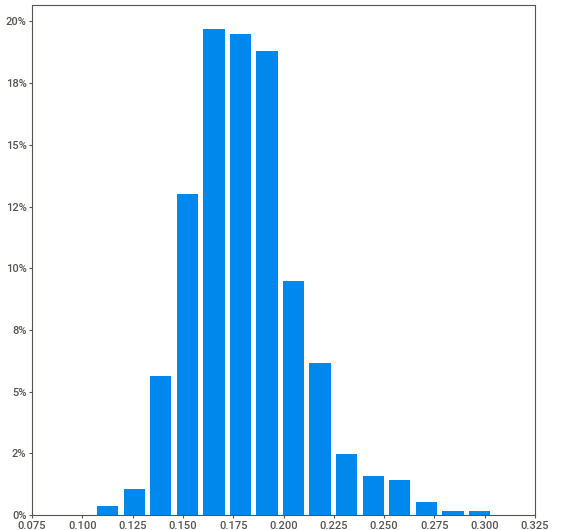
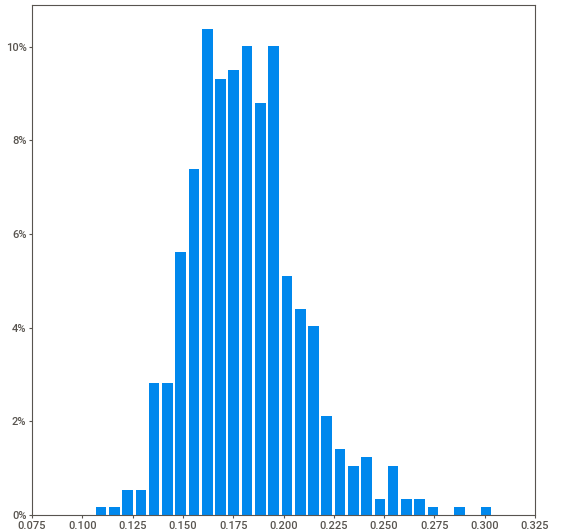
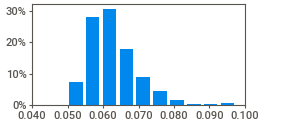
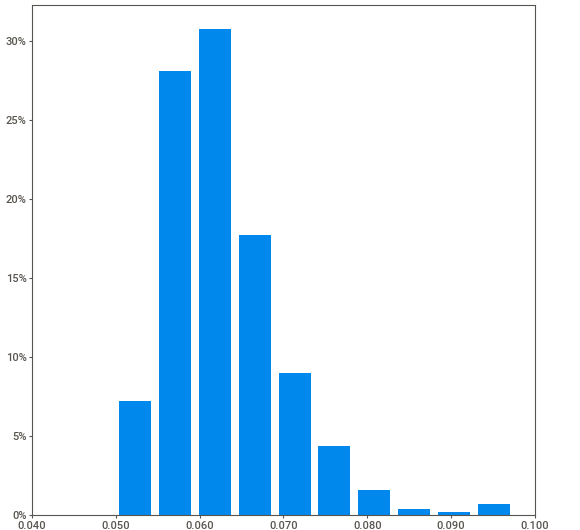
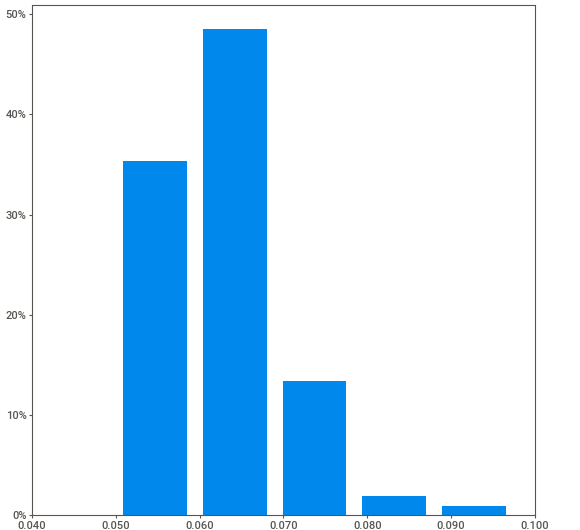
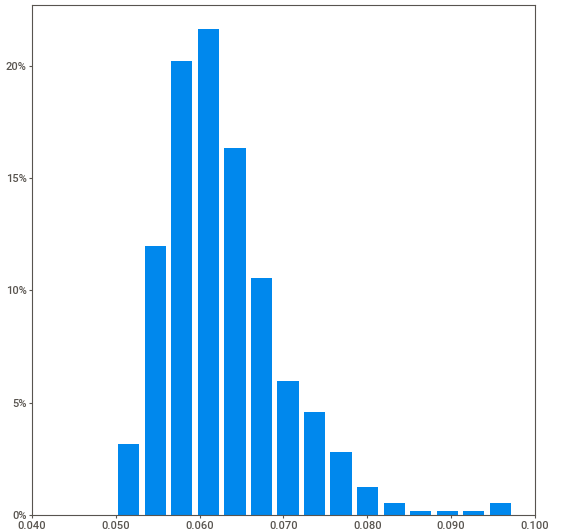
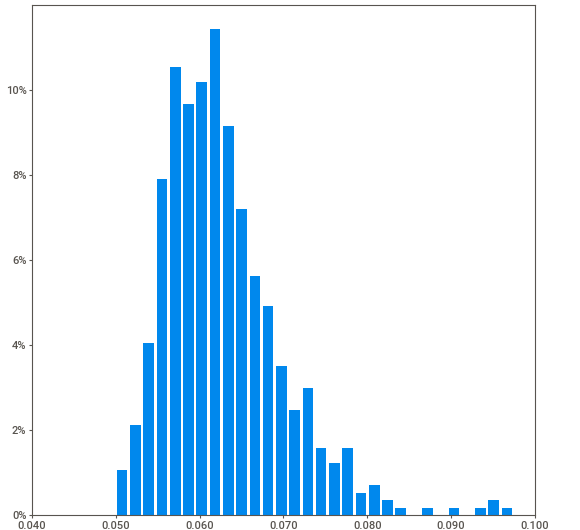
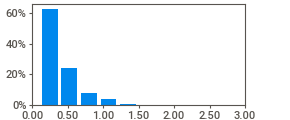
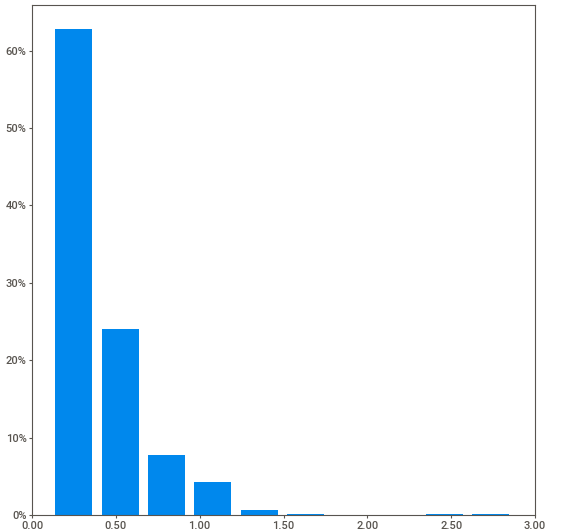
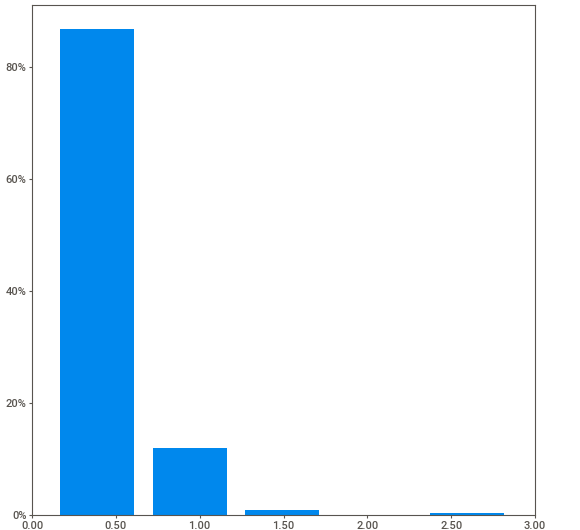
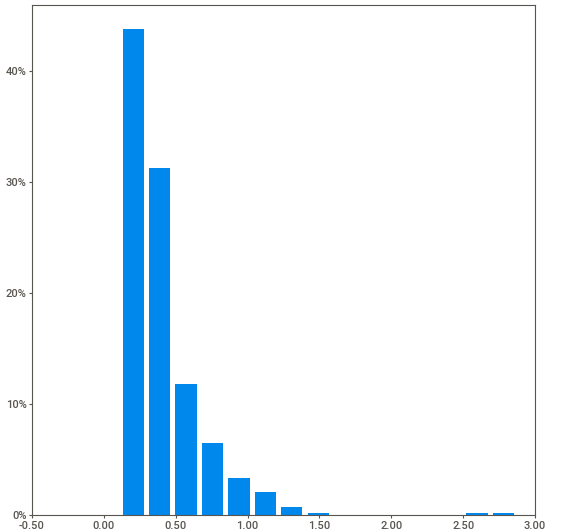
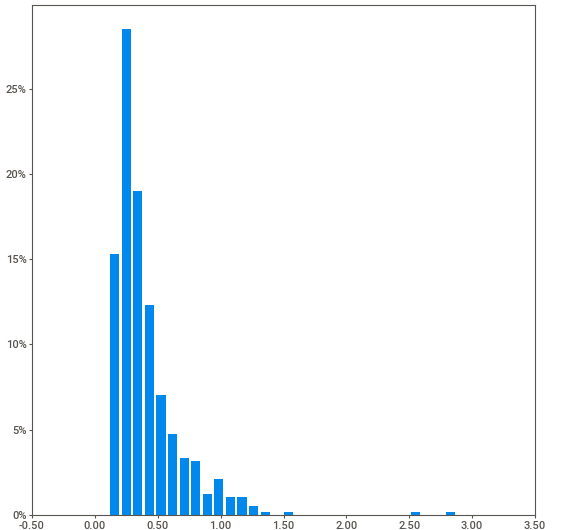
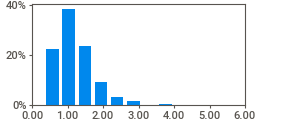
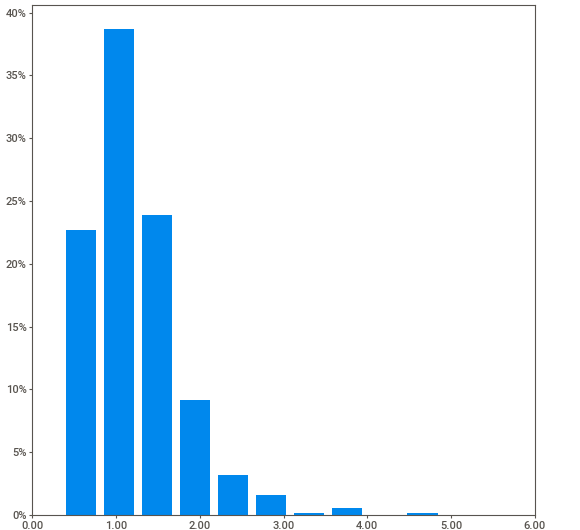
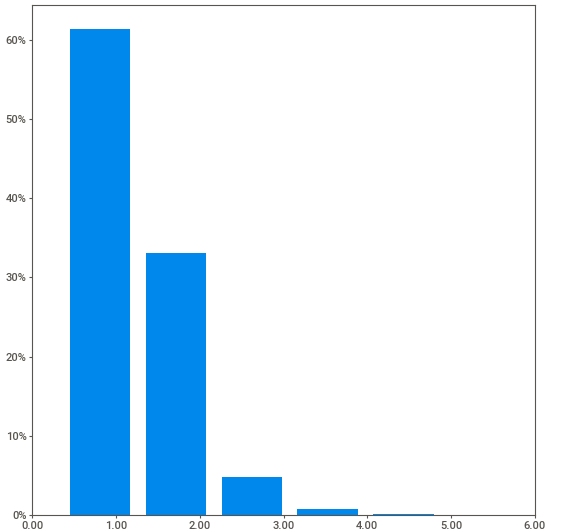
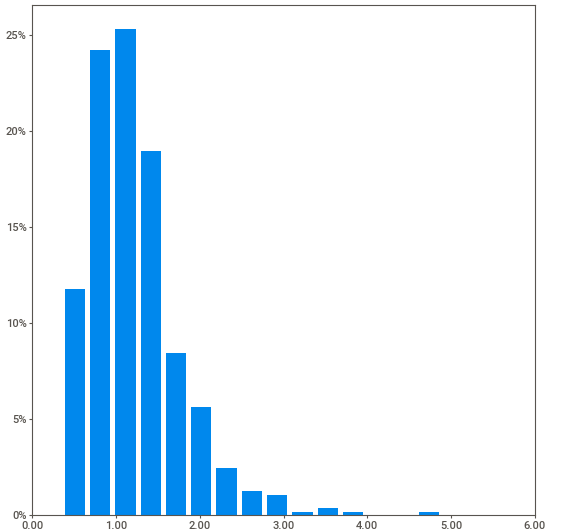
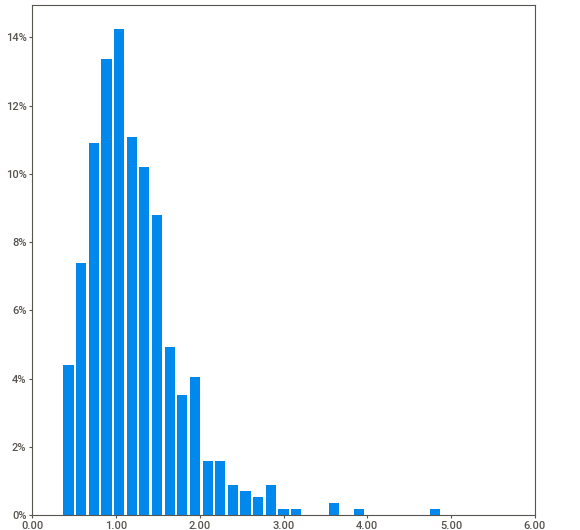
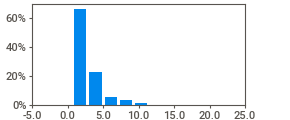
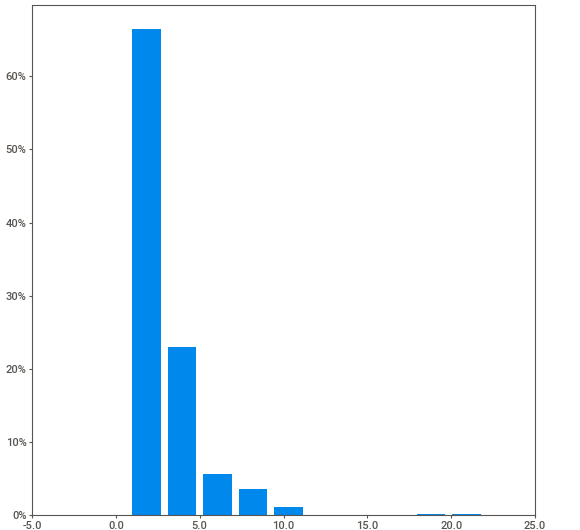
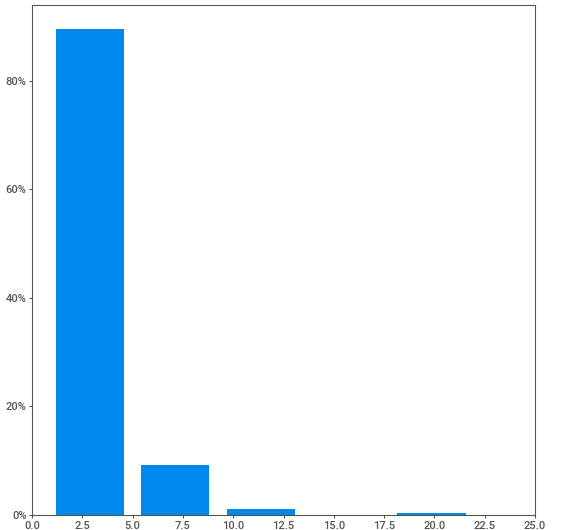
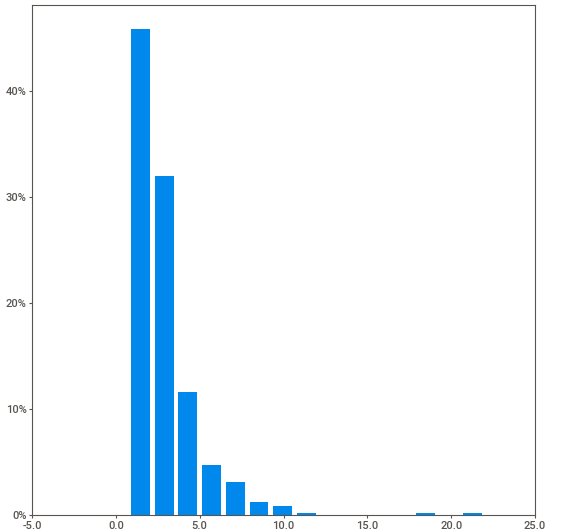
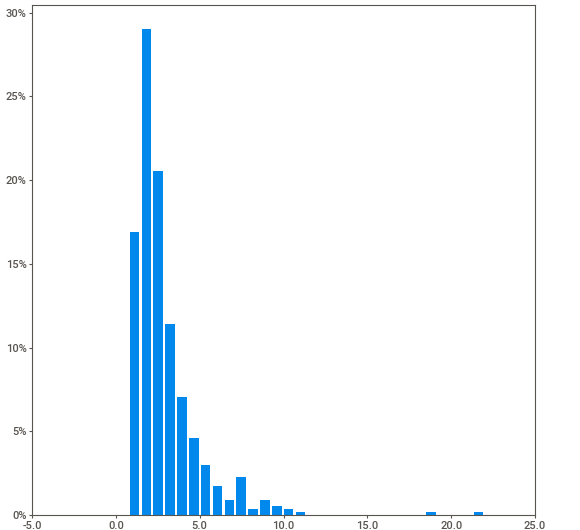
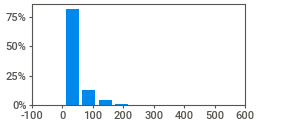
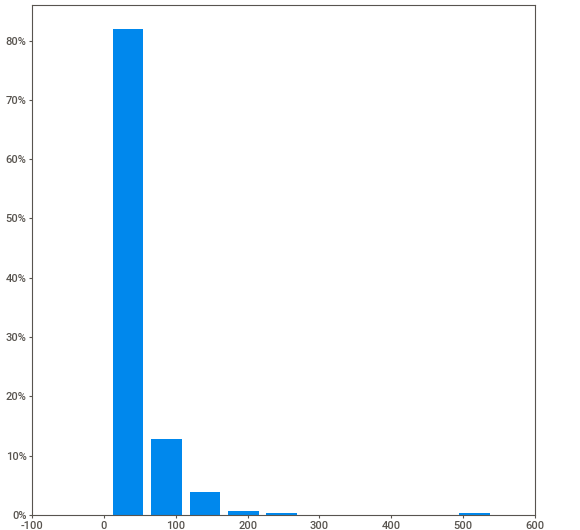
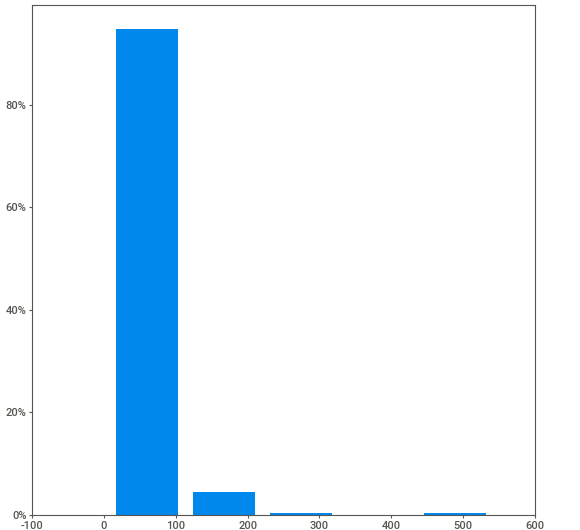
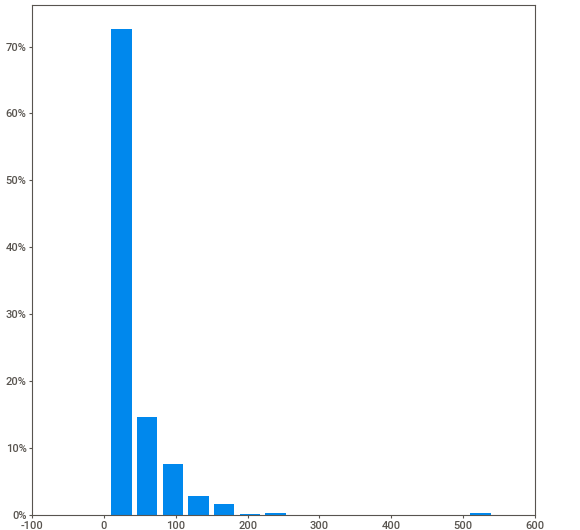
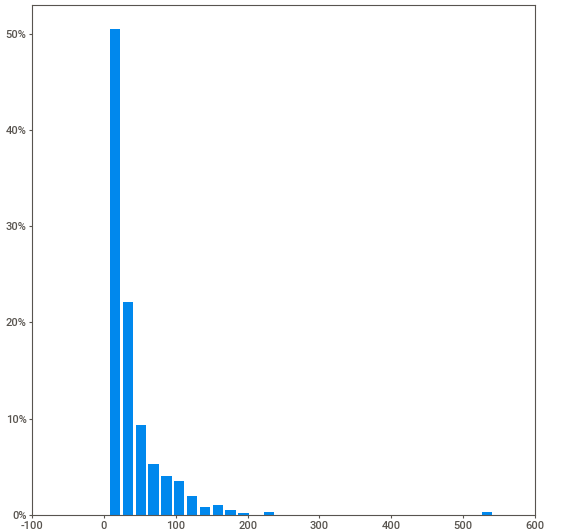
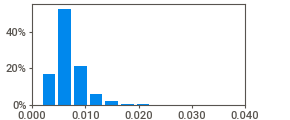
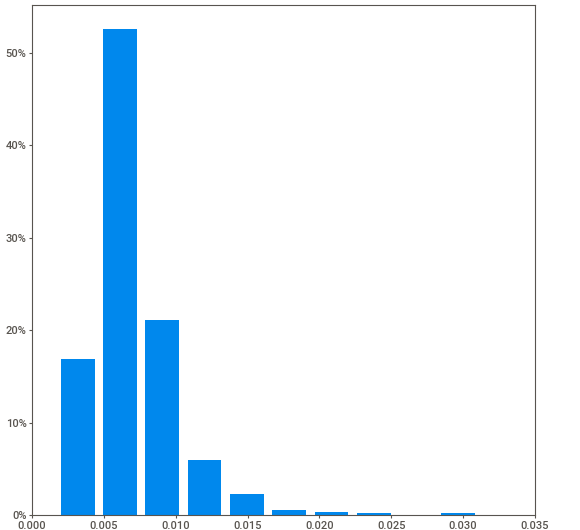
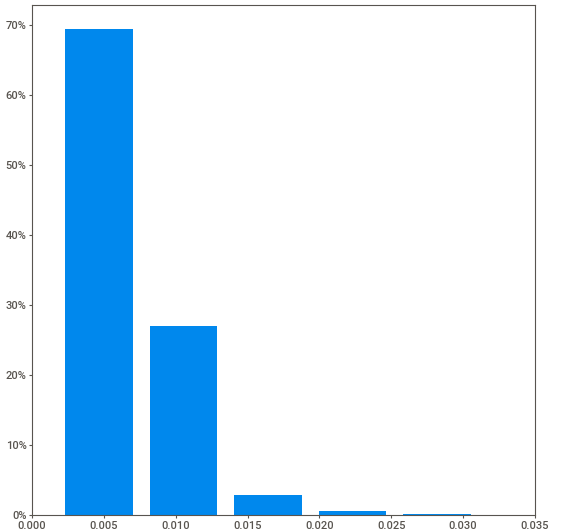
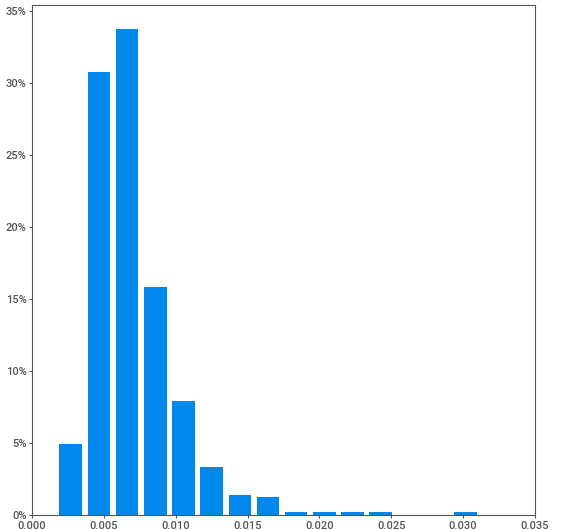
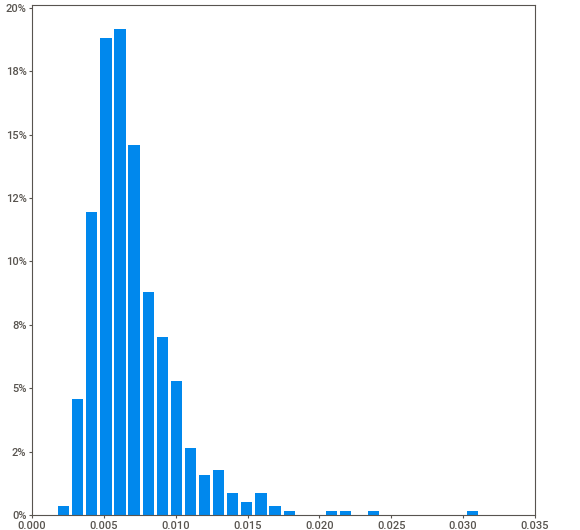
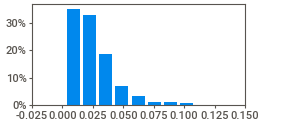
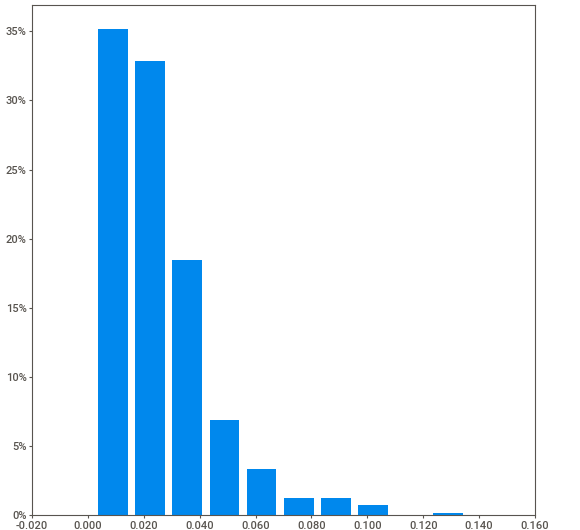
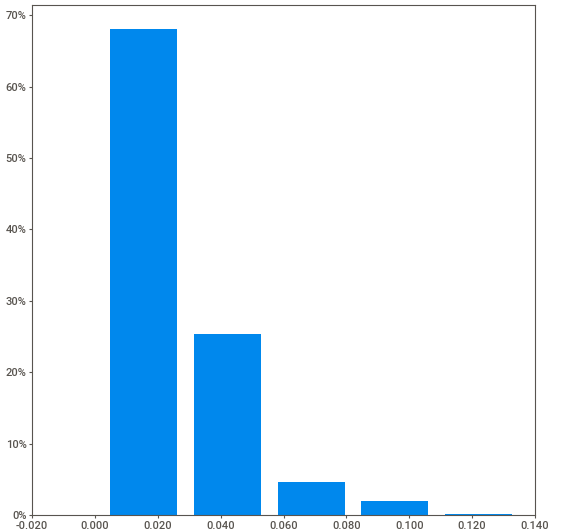
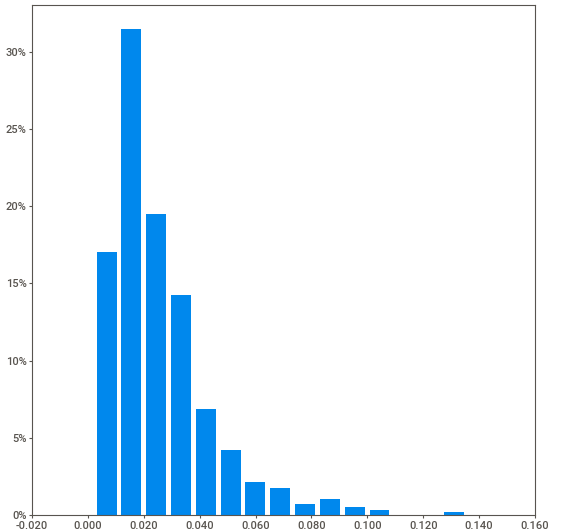
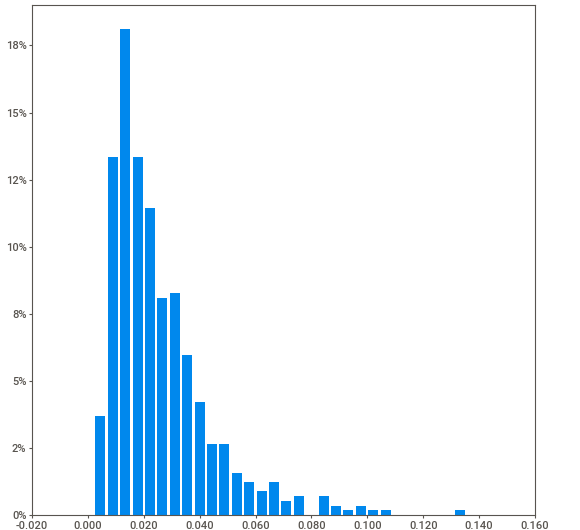
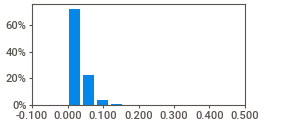
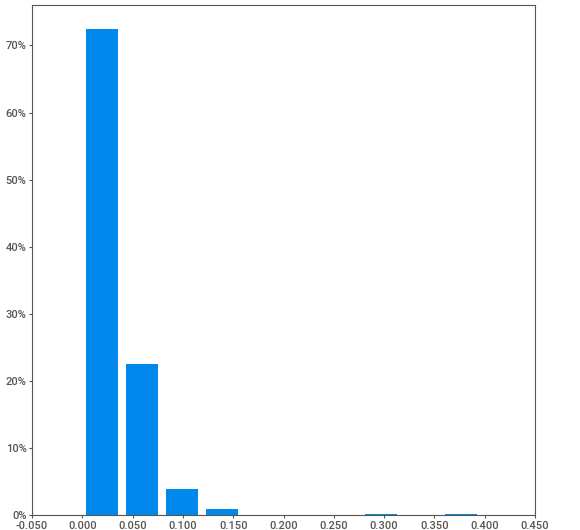
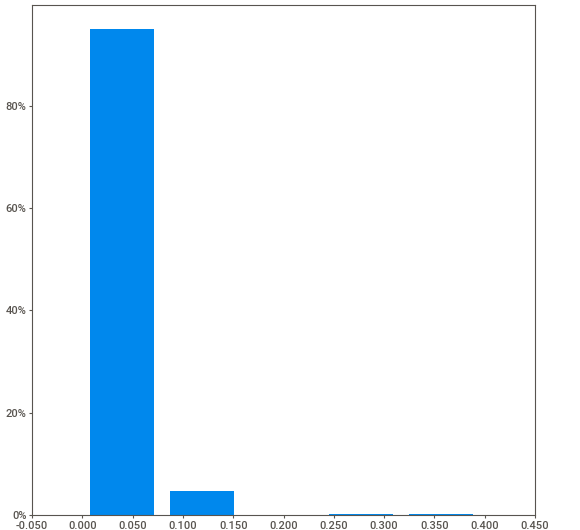
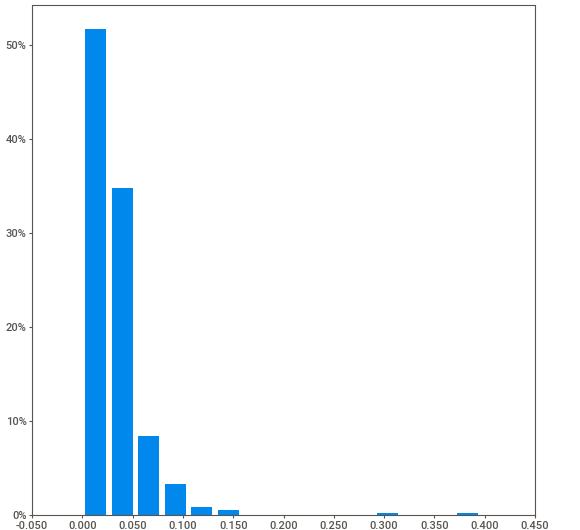
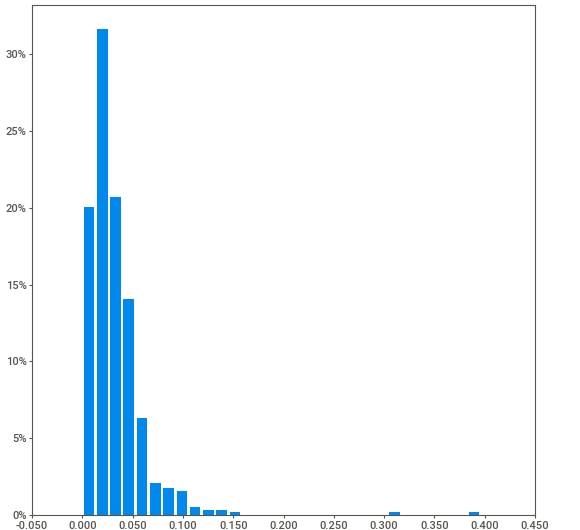
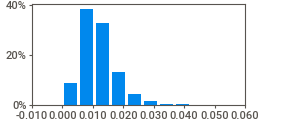
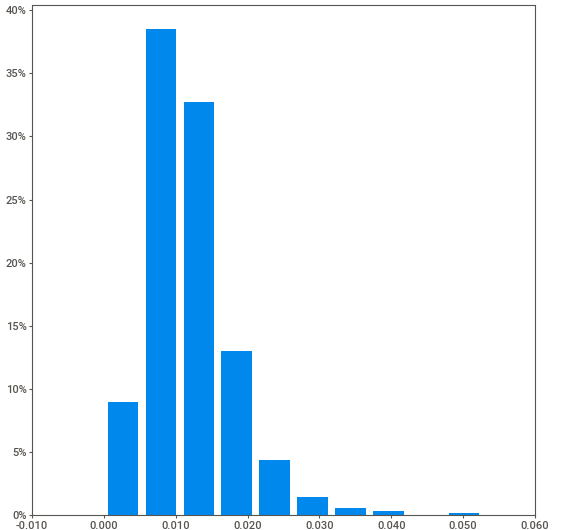
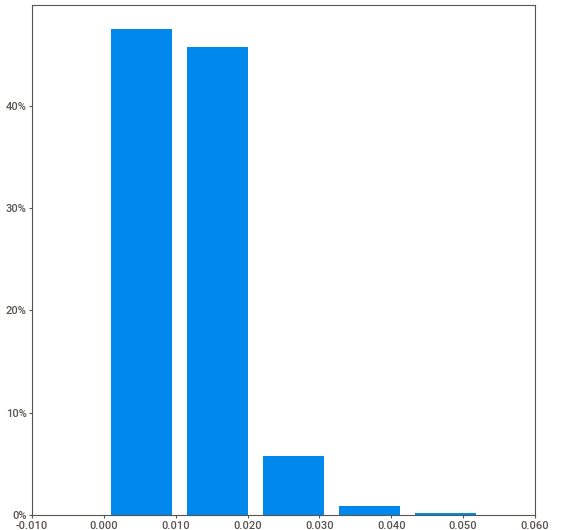
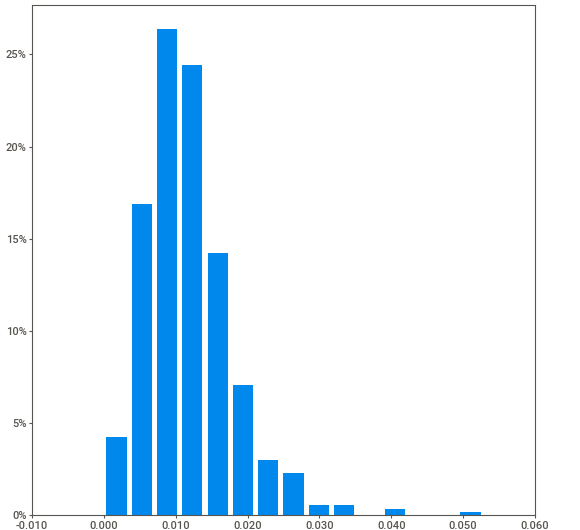
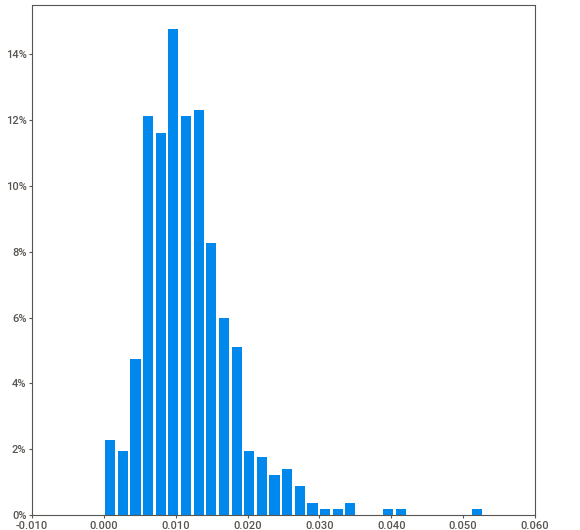
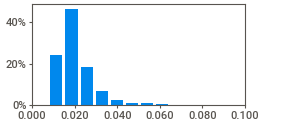
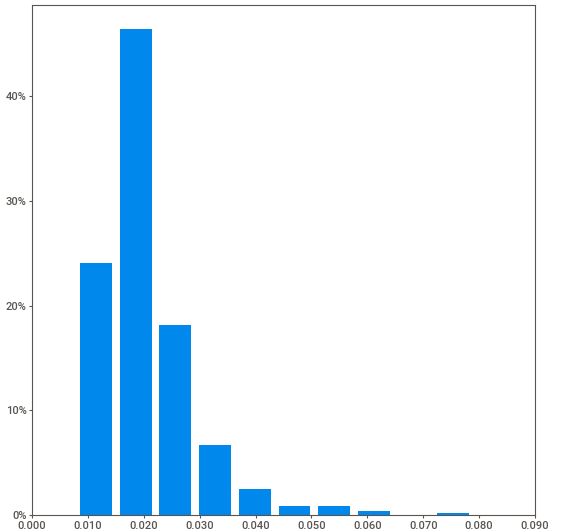
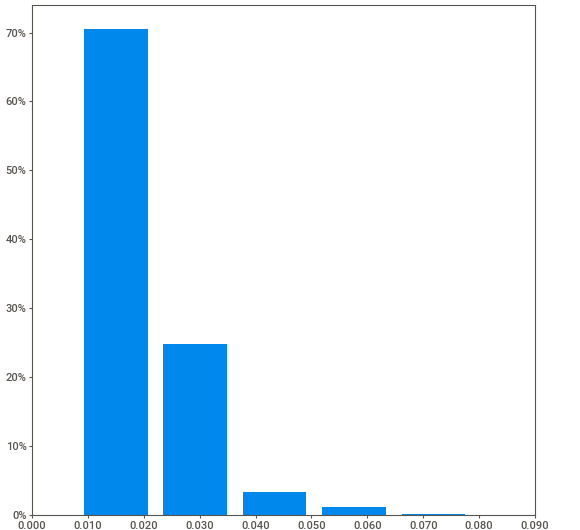
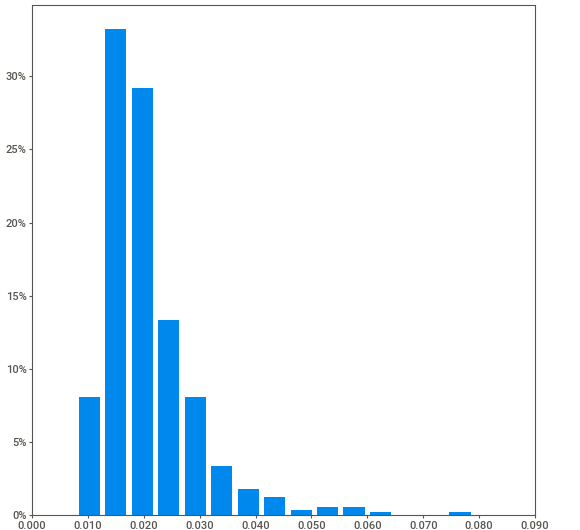
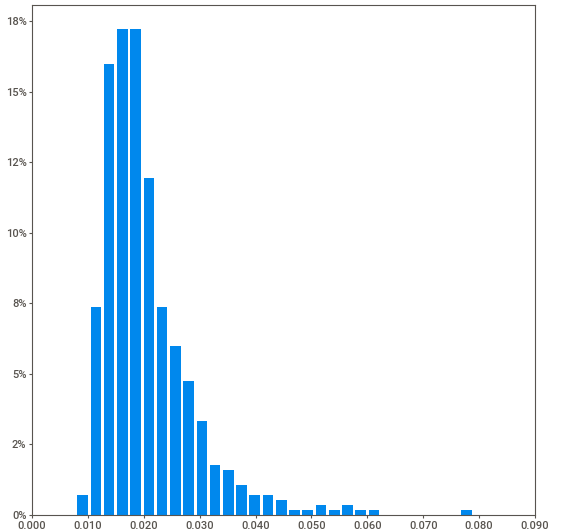
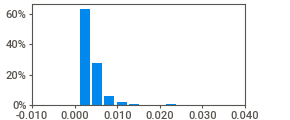
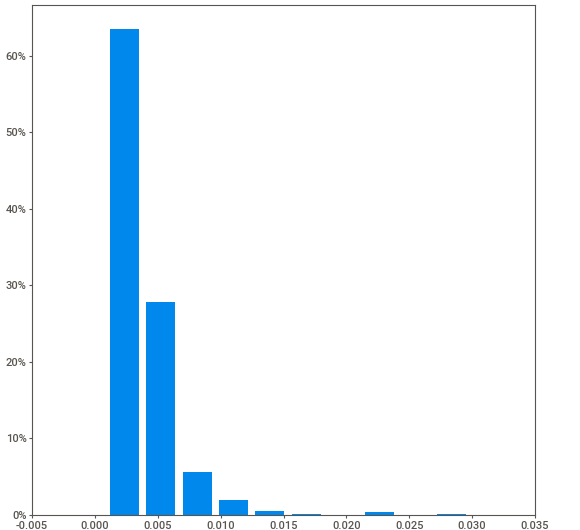
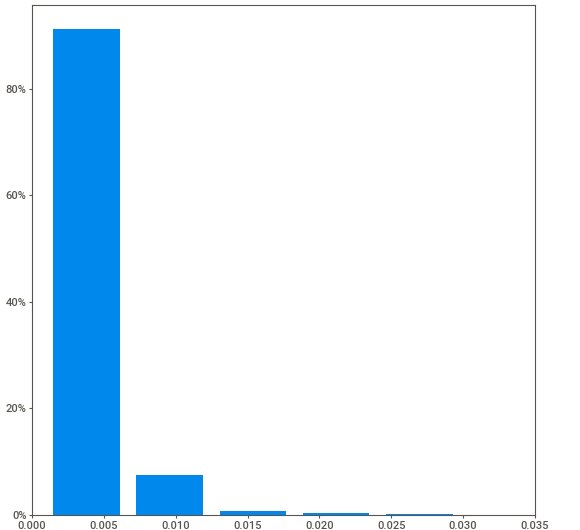
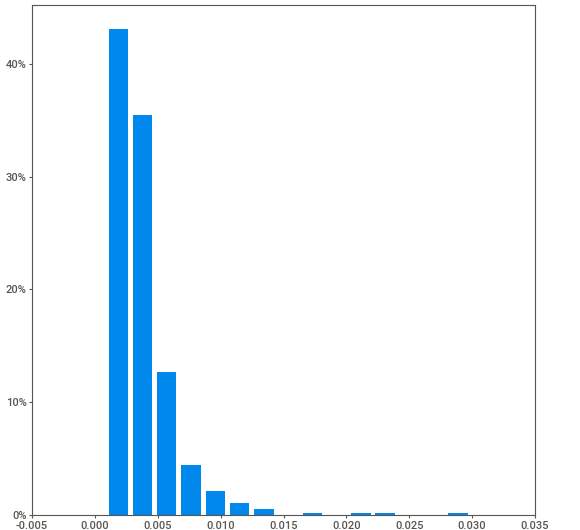
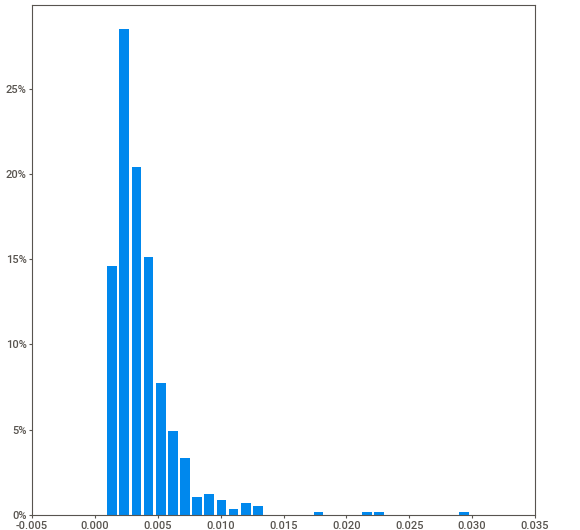
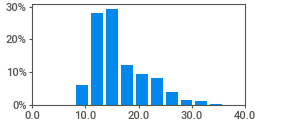
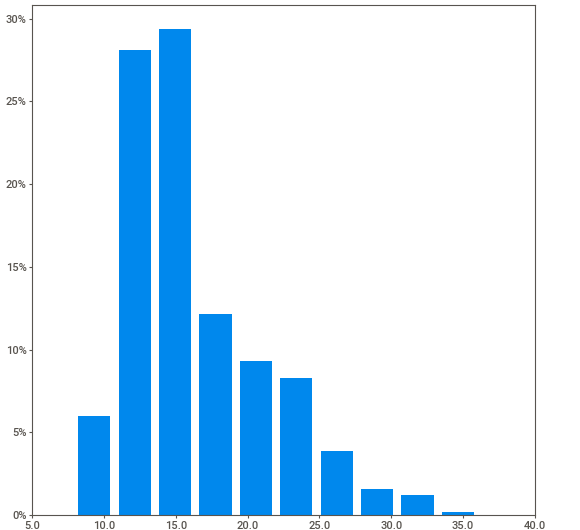
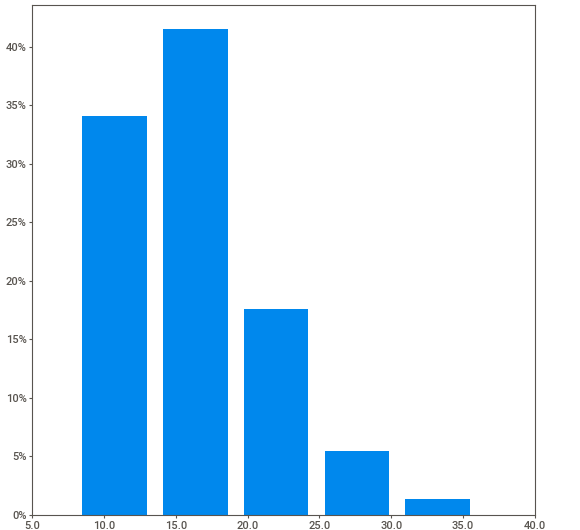
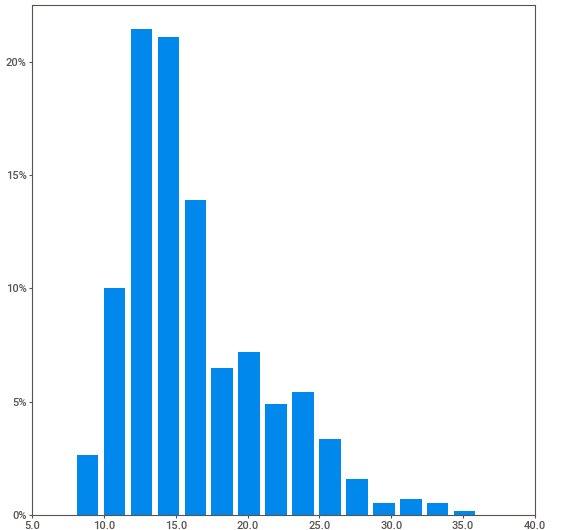
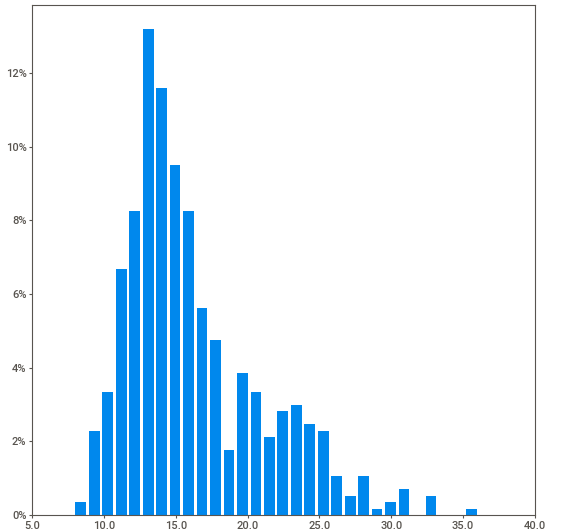
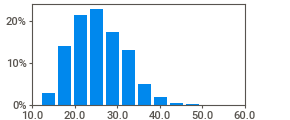
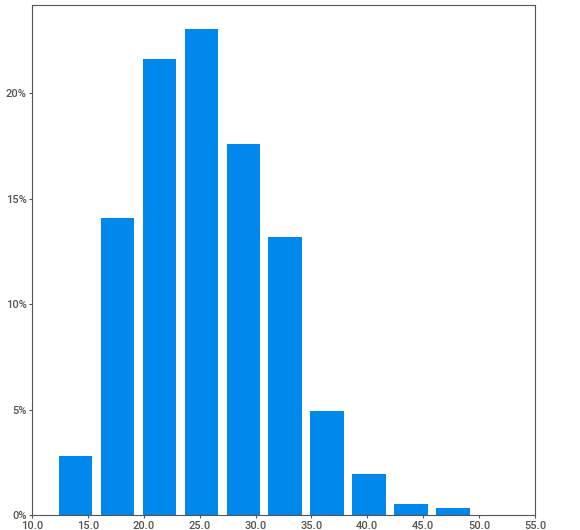
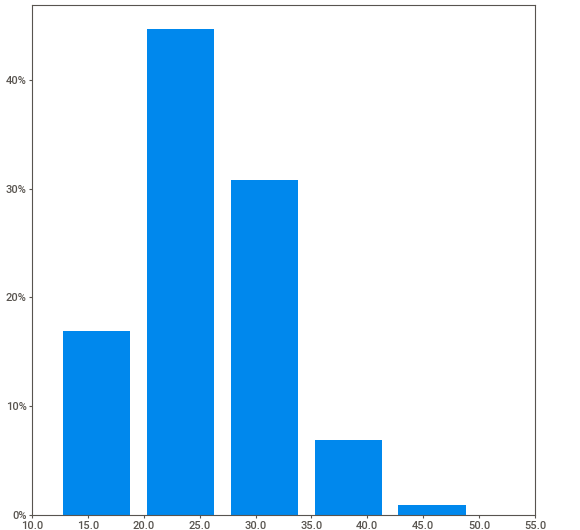
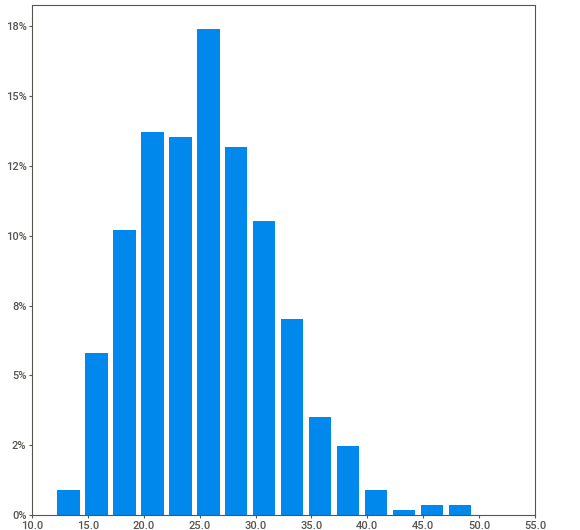
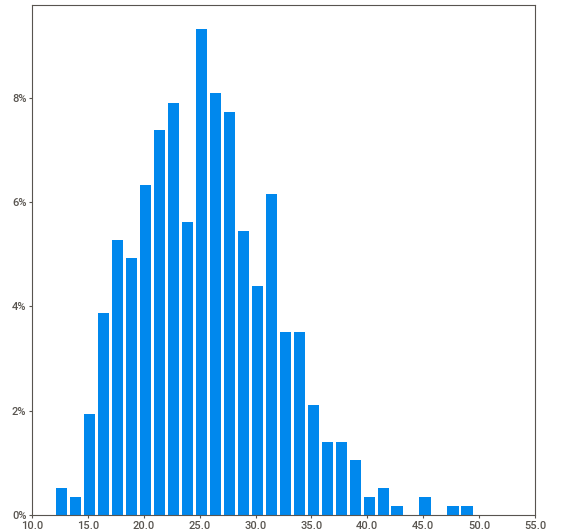
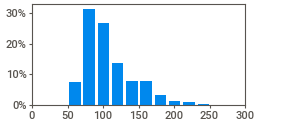
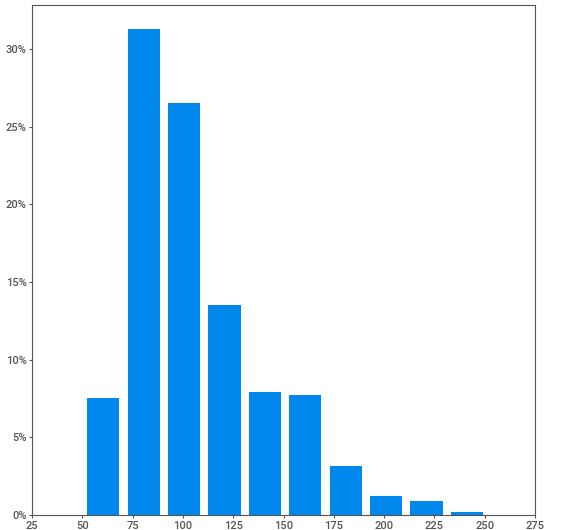
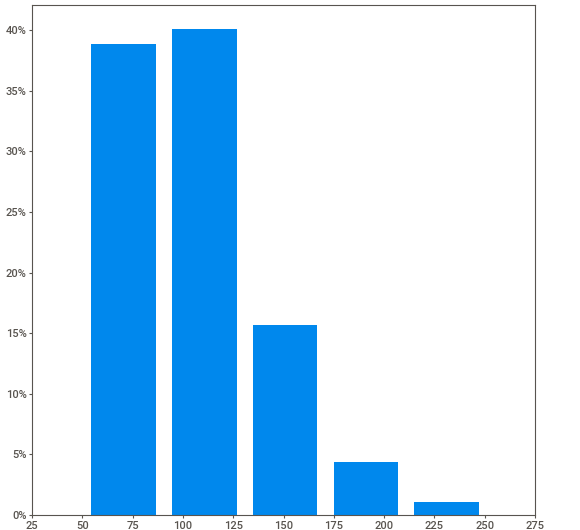
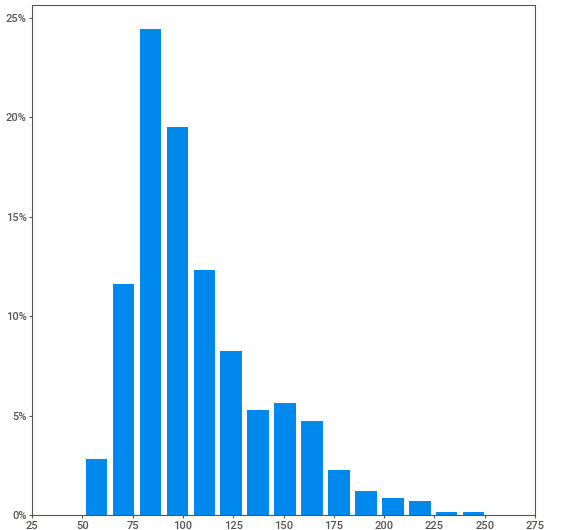
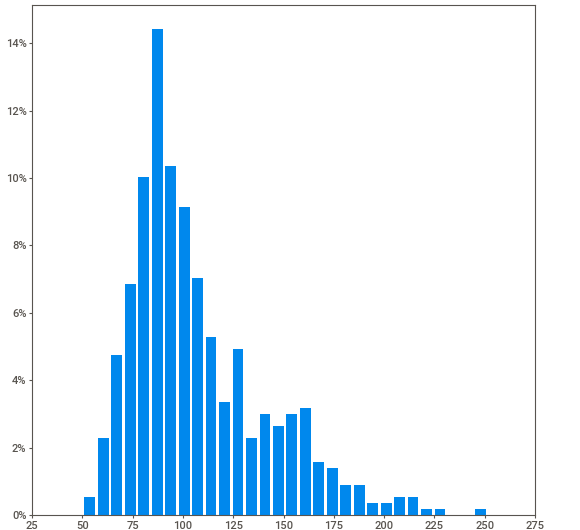
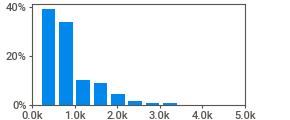
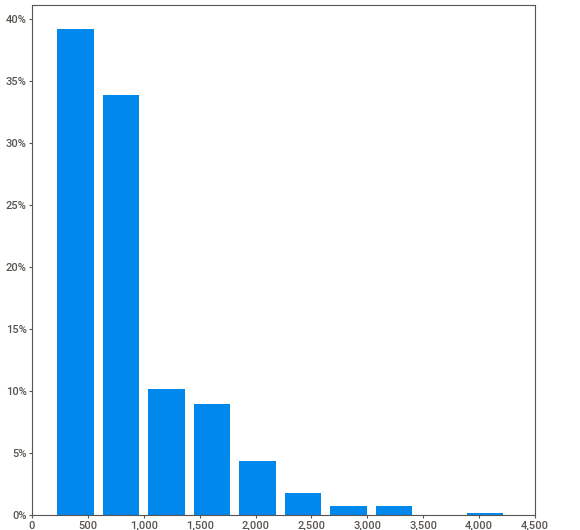
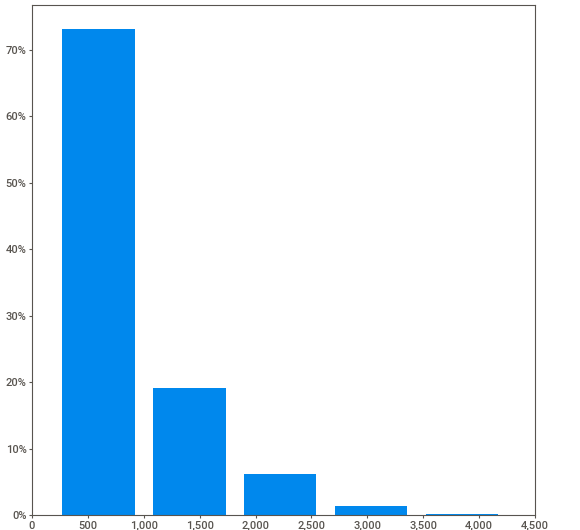
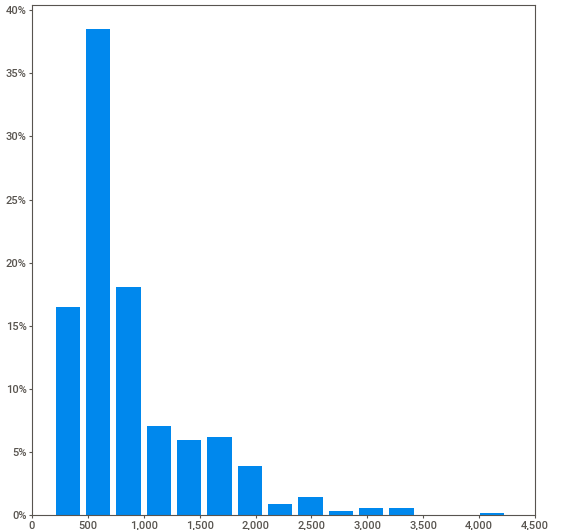
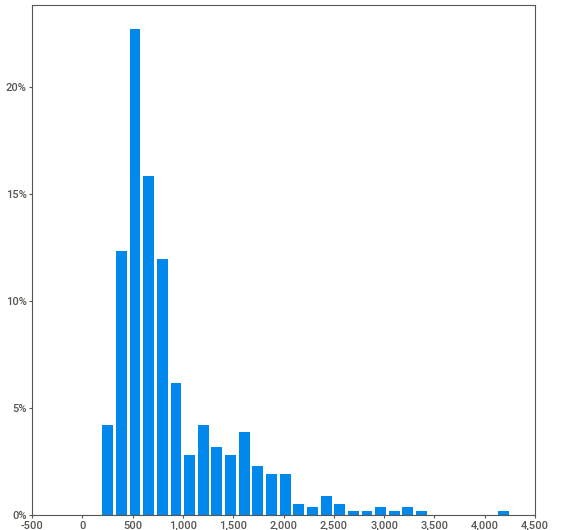
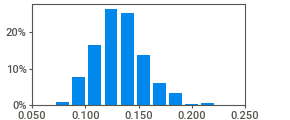
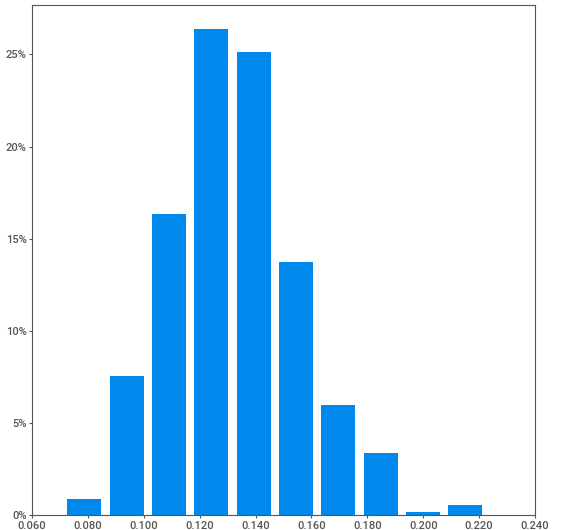
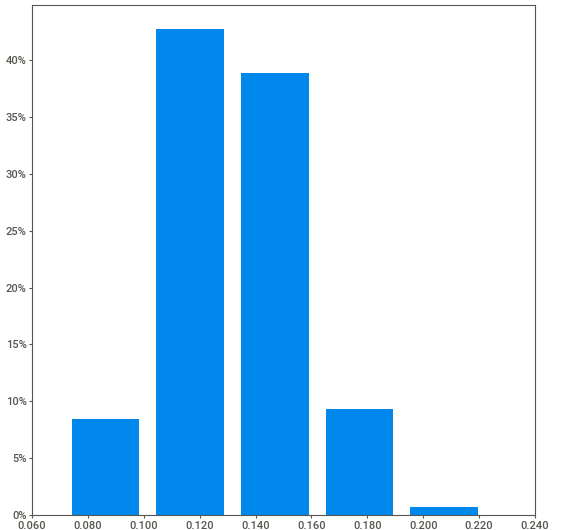
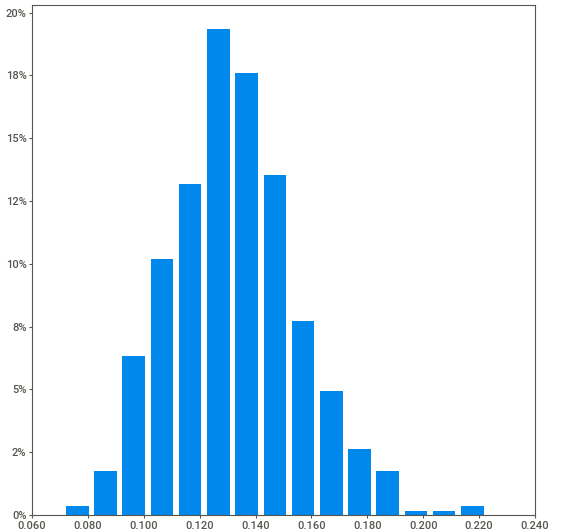
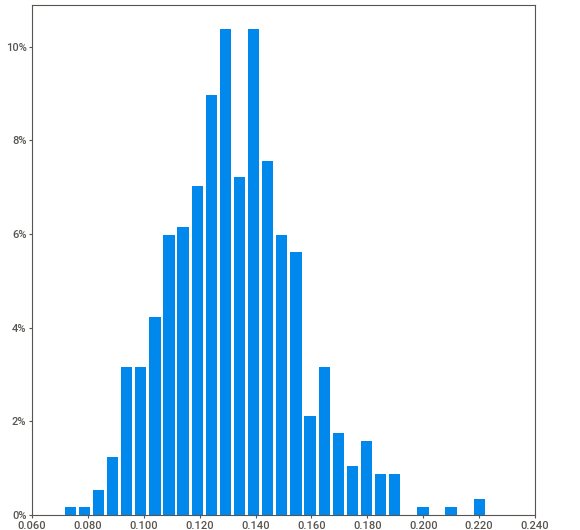
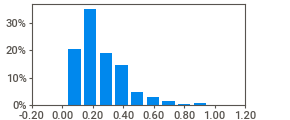
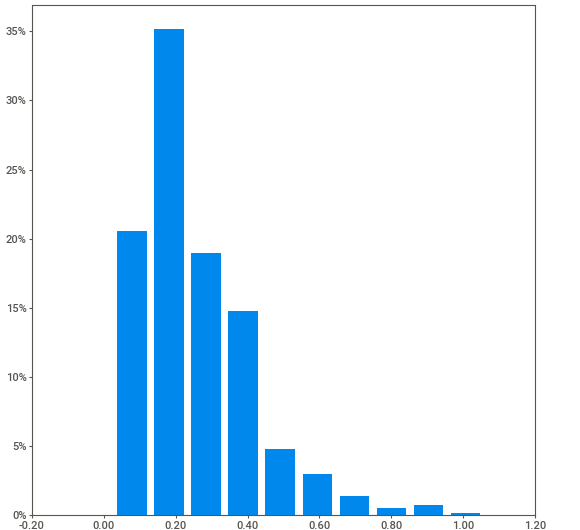
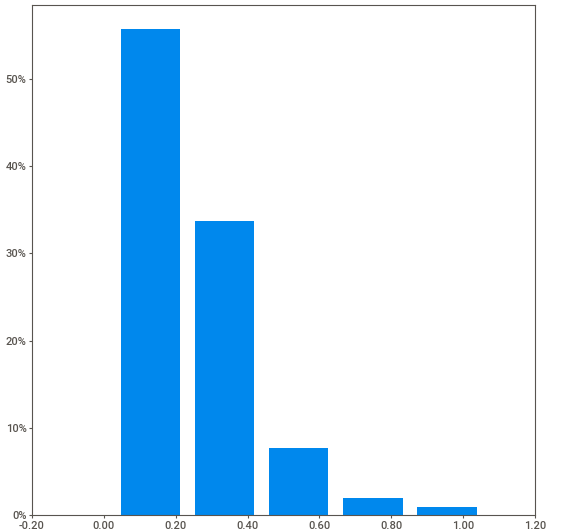
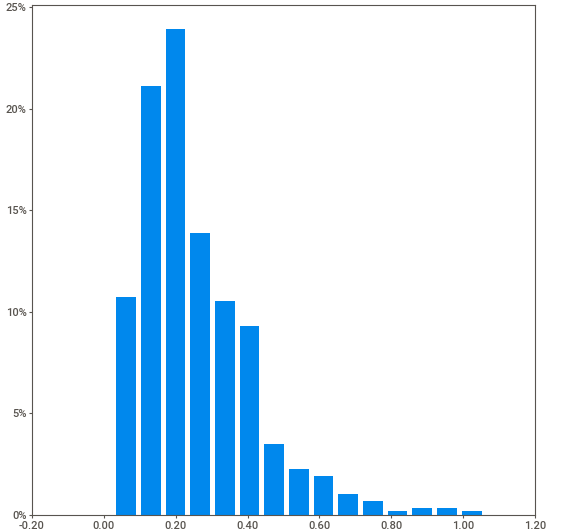
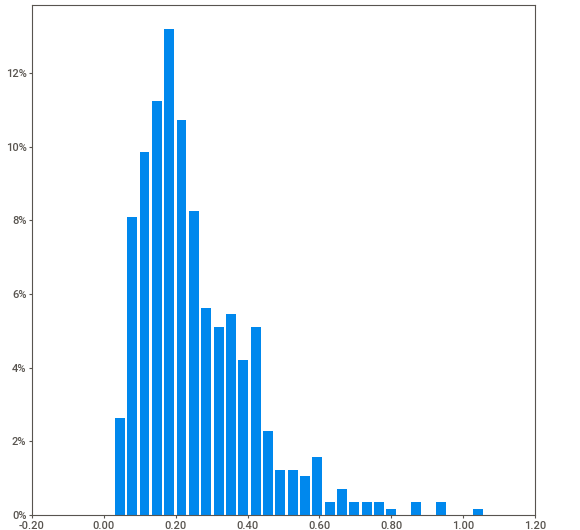
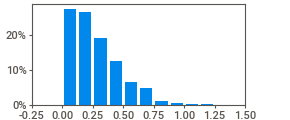
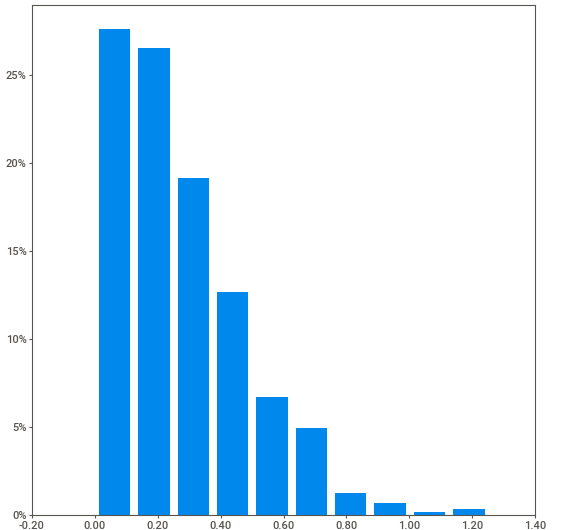
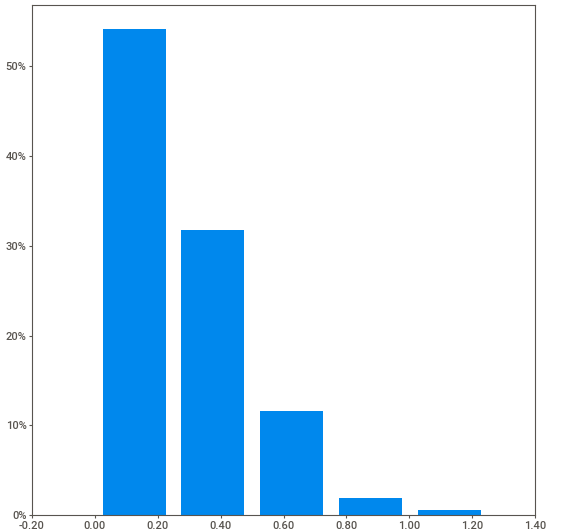
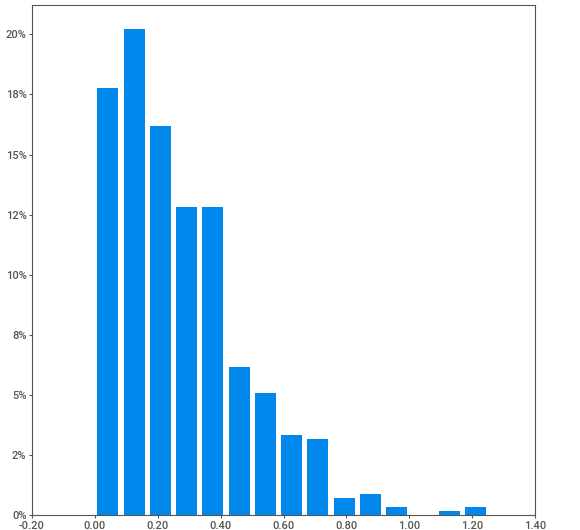
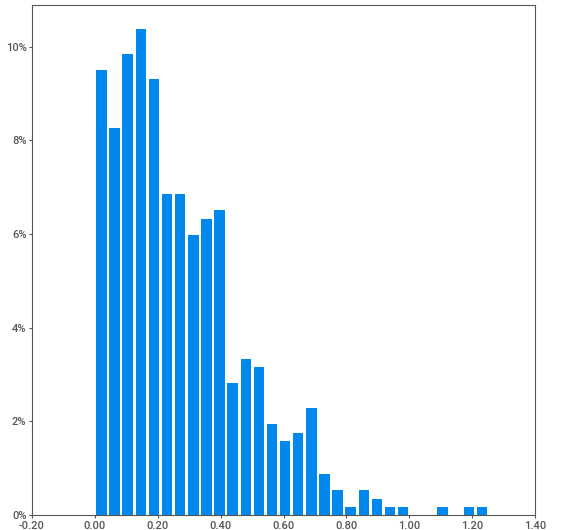
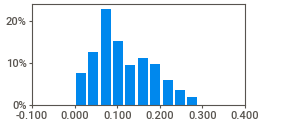
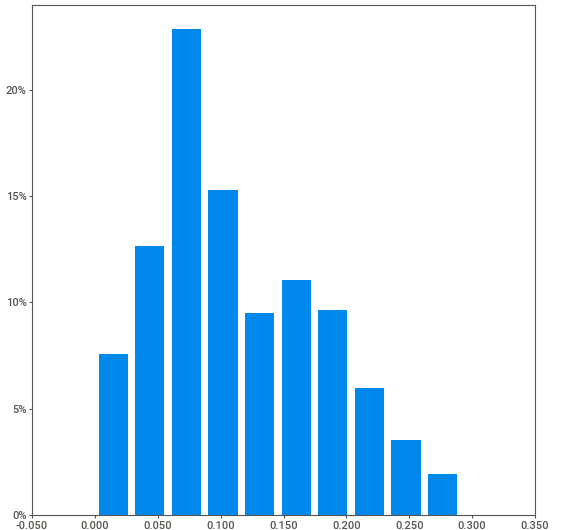
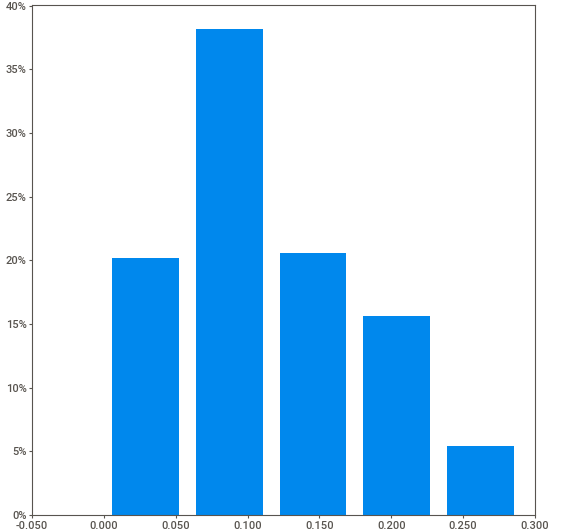
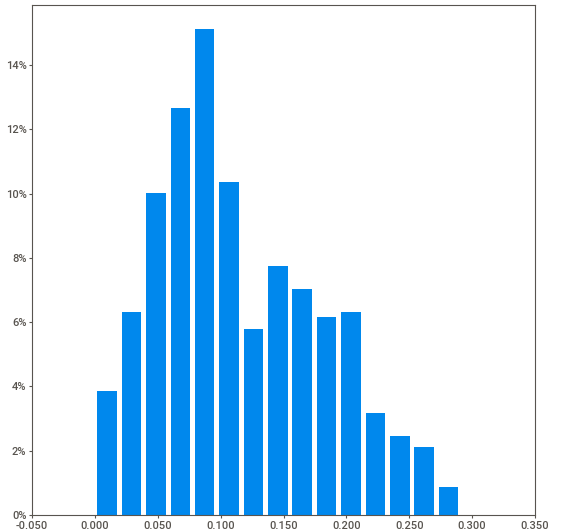
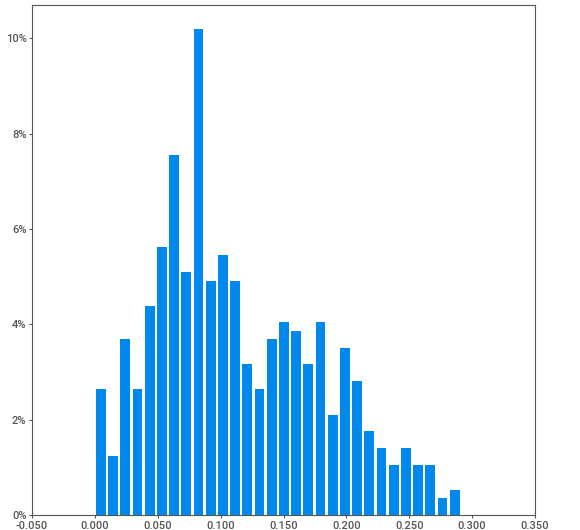
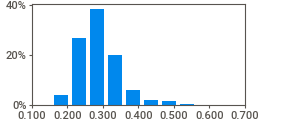
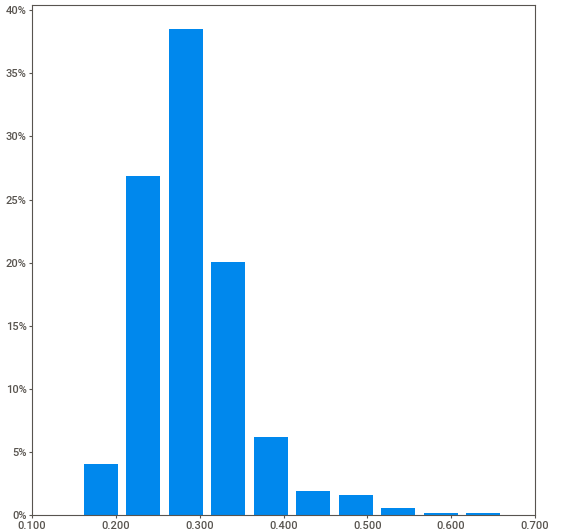
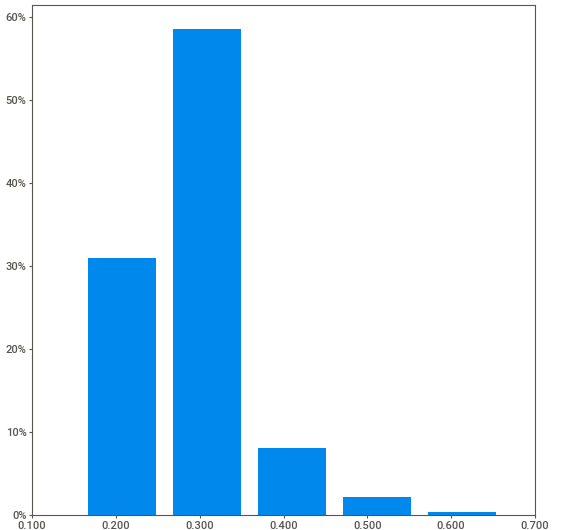
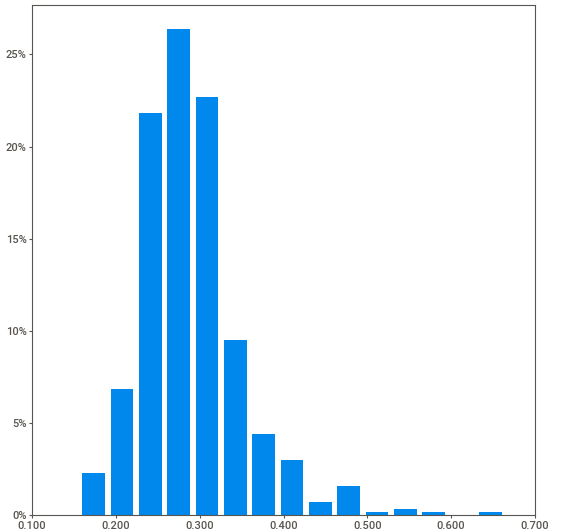
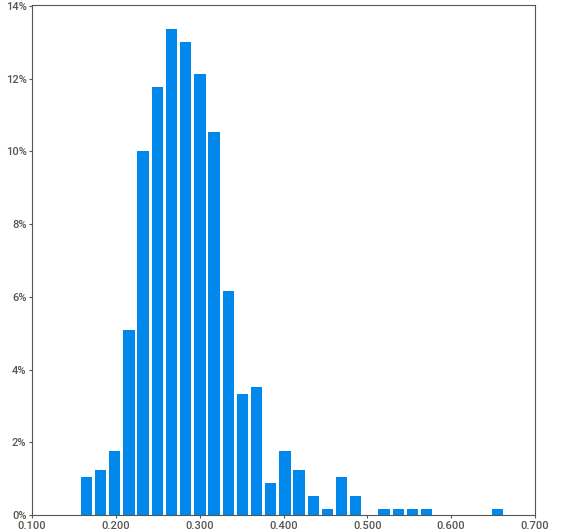
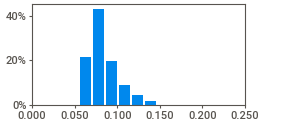
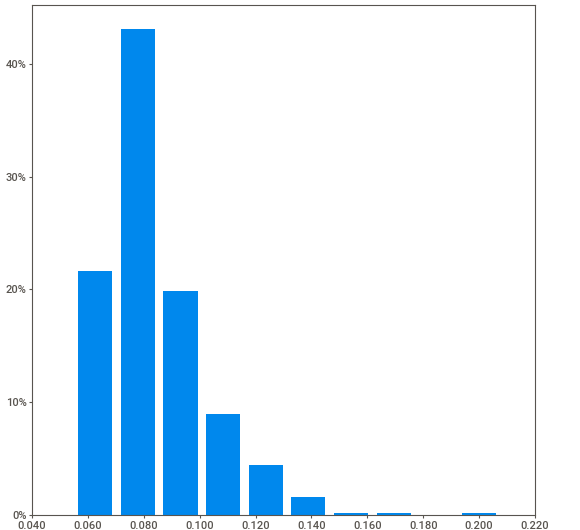
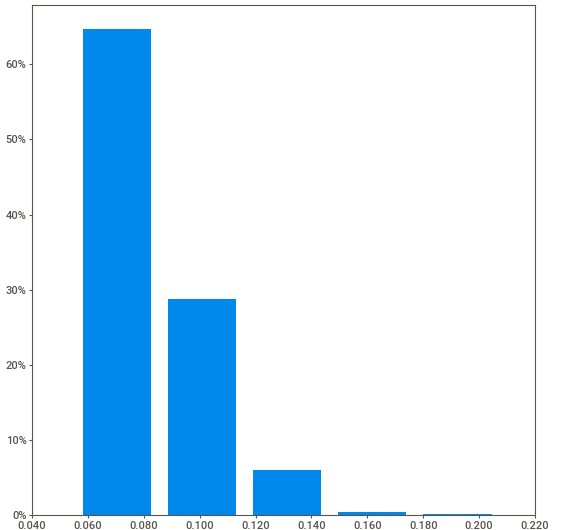
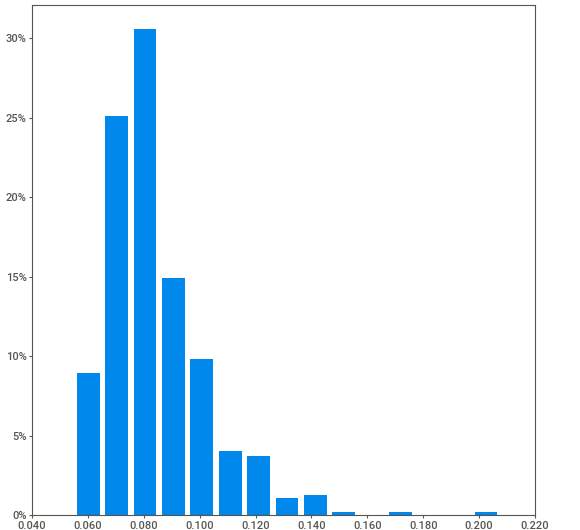
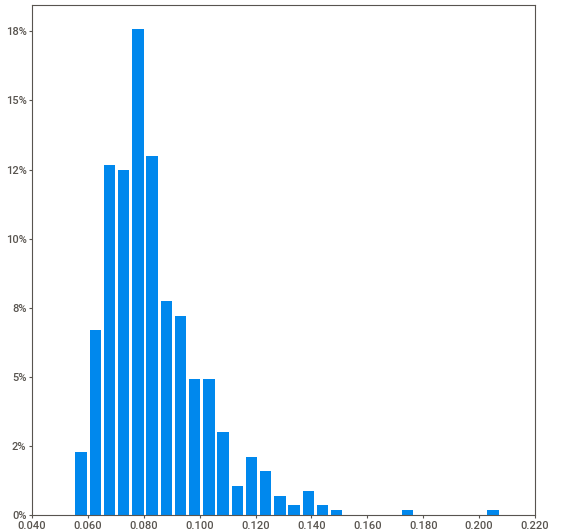
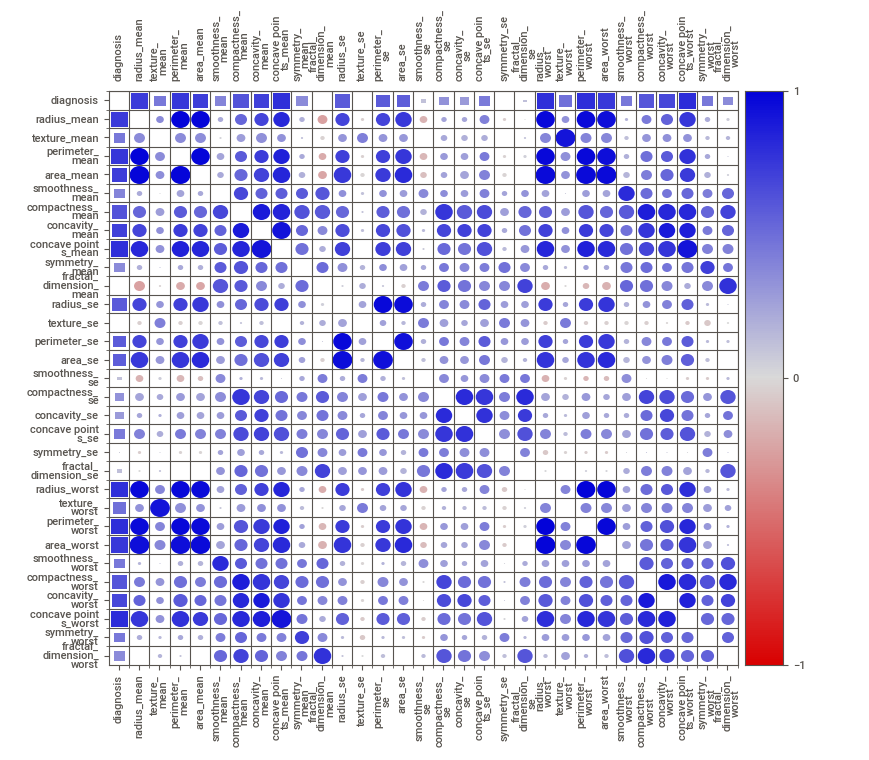
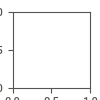

In [18]:
report = sv.analyze(tumor)
report.show_notebook()

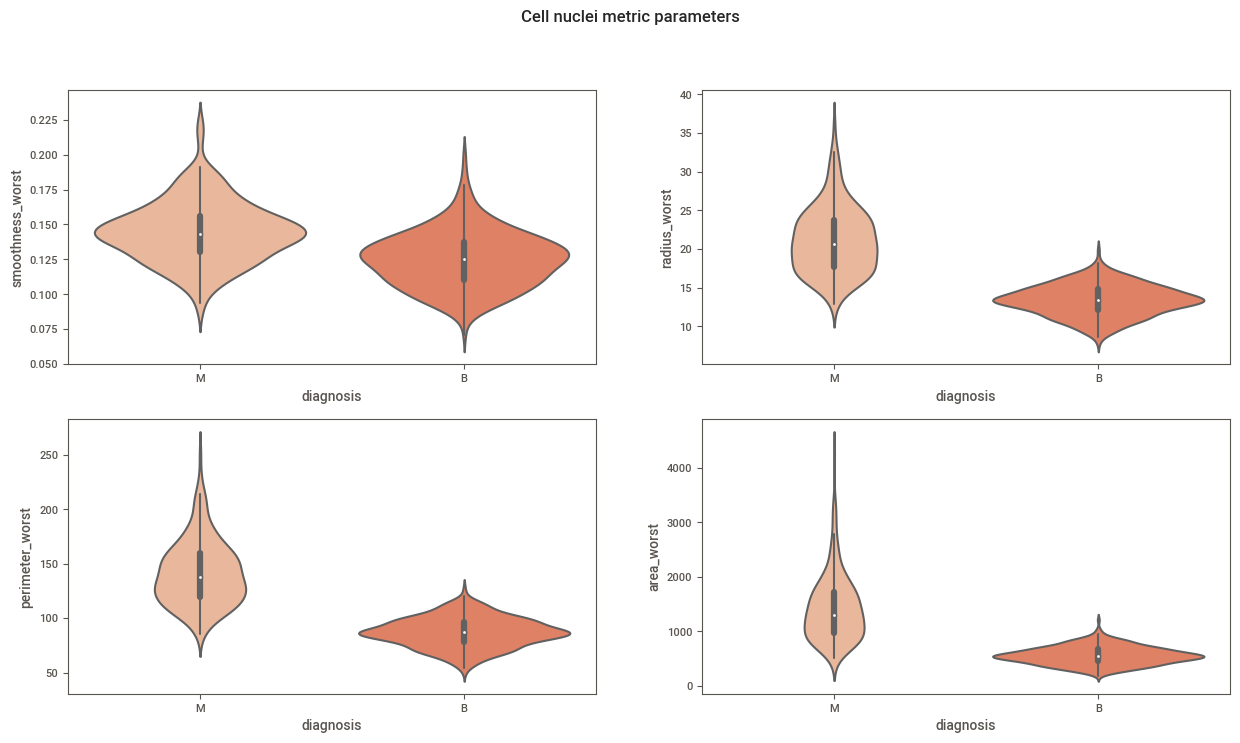

In [19]:
f, ax = plt.subplots(2, 2, figsize=(15,8))
f.suptitle('Cell nuclei metric parameters')

sns.set_theme(style='darkgrid', palette='rocket_r')
sns.violinplot(ax=ax[0,0], x='diagnosis', y='smoothness_worst', data=tumor)
sns.violinplot(ax=ax[0,1], x='diagnosis', y='radius_worst', data=tumor)
sns.violinplot(ax=ax[1,0], x='diagnosis', y='perimeter_worst', data=tumor)
sns.violinplot(ax=ax[1,1], x='diagnosis', y='area_worst', data=tumor)
plt.show()

<AxesSubplot:xlabel='fractal_dimension_worst', ylabel='Count'>

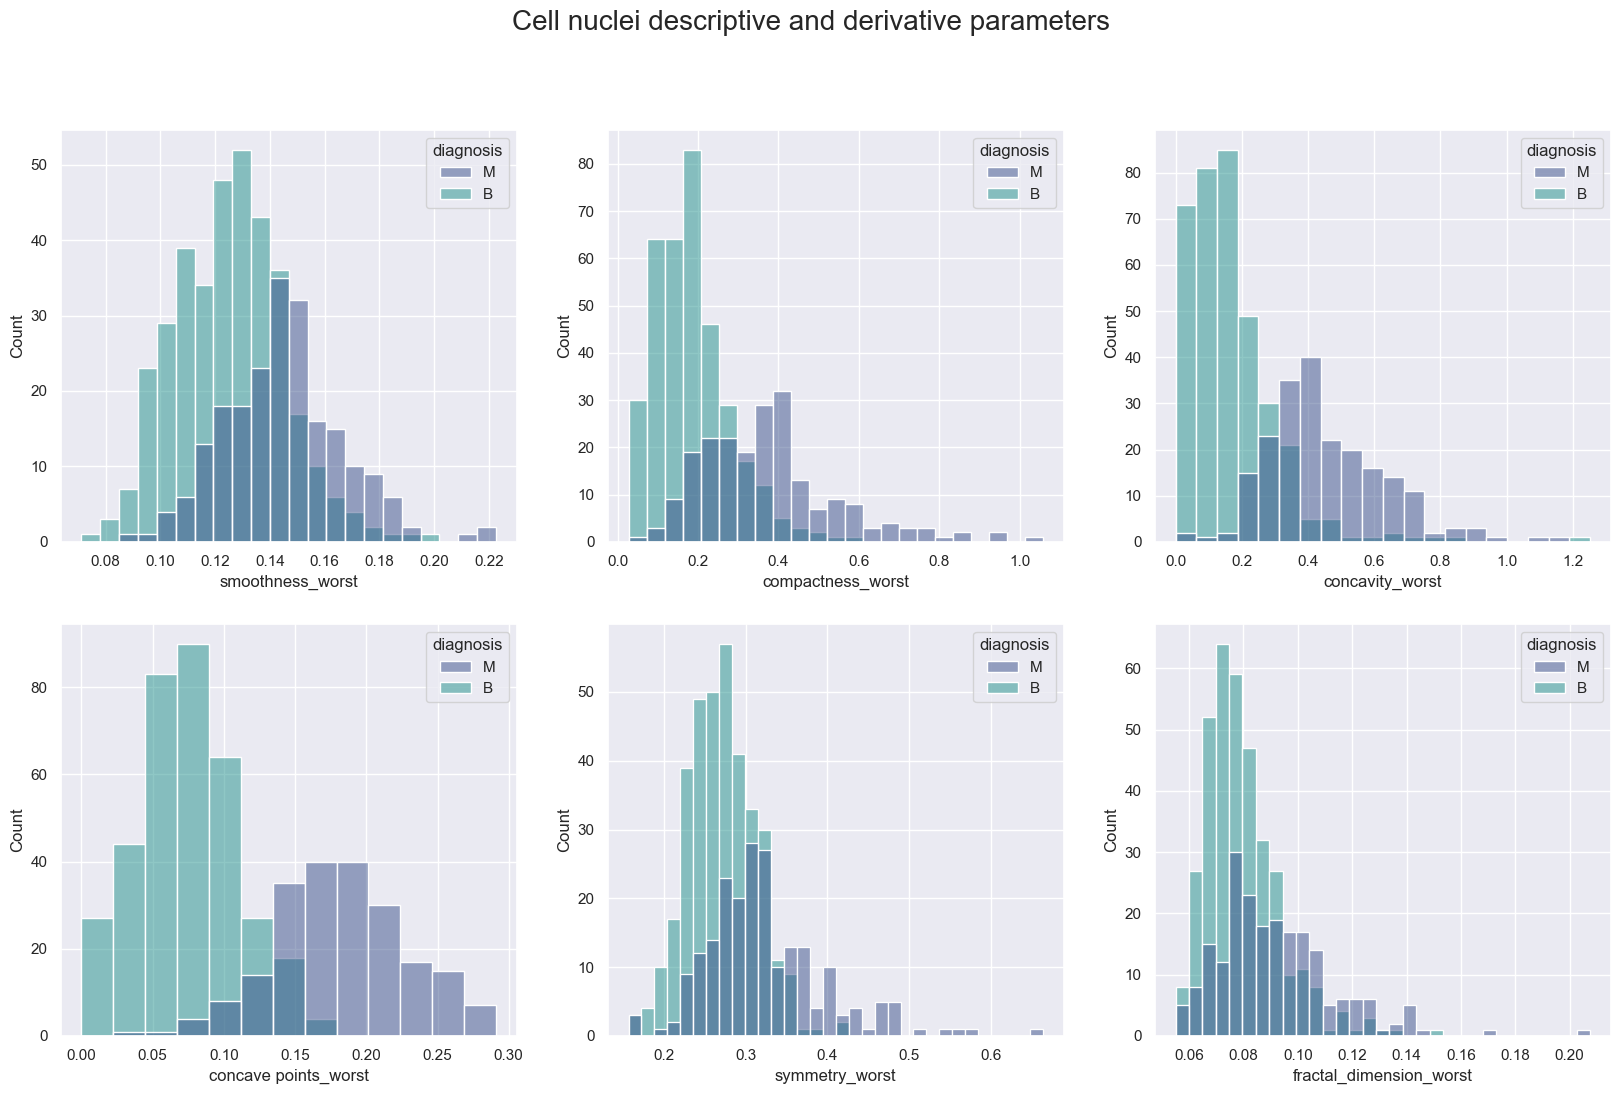

In [20]:
f, ax = plt.subplots(2, 3, figsize=(20,12))
f.suptitle('Cell nuclei descriptive and derivative parameters', fontsize=20)

sns.set_palette('viridis', n_colors=3)
sns.histplot(ax=ax[0,0], hue='diagnosis', x='smoothness_worst', data=tumor)
sns.histplot(ax=ax[0,1], hue='diagnosis', x='compactness_worst', data=tumor)
sns.histplot(ax=ax[0,2], hue='diagnosis', x='concavity_worst', data=tumor)
sns.histplot(ax=ax[1,0], hue='diagnosis', x='concave points_worst', data=tumor)
sns.histplot(ax=ax[1,1], hue='diagnosis', x='symmetry_worst', data=tumor)
sns.histplot(ax=ax[1,2], hue='diagnosis', x='fractal_dimension_worst', data=tumor)

In [21]:
X = tumor.iloc[:,1:]
y = tumor['diagnosis']


## Modelling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd)

In [23]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=rnd)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [24]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X.columns,
                                class_names=['B', 'M'],
                                filled=True)

graph = graphviz.Source(dot_data, format='png')
graph

NameError: name 'tree' is not defined

In [ ]:
dtc.score(X_test, y_test)

In [ ]:
confusion_matrix(y_test, y_pred, labels=['M', 'B'])

## Step back to data prep

This section we will start with eliminating unnecessary features which are highly correlated with others. It will make set clearer and somehow influence decision tree to have stable bias, no matter how observations are split.

In [ ]:
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.xticks(rotation=45)

List below contains features correlated with one that keep remain in X1 (remaining are chosen from group by lowest skewness).

In [ ]:
drop_params = ['radius_mean', 'perimeter_mean', 'radius_worst',
               'perimeter_worst', 'area_worst', 'perimeter_se',
               'area_se', 'concavity_worst', 'compactness_worst',
               'concave points_mean']
X1 = X.drop(drop_params, axis=1)
X1.info()

In [ ]:
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X1.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.xticks(rotation=45)

Now the target is to set most informative feature, which will be used in split stratification.

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=rnd)

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=rnd)
dtc = dtc.fit(X1_train, y_train)
y_pred = dtc.predict(X1_test)

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X1.columns,
                                class_names=['B', 'M'],
                                filled=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [ ]:
dtc.score(X1_test, y_test)

## GridSearch Cross-Validation

From tree diagram, we can tell that most informative feature is 'concave points_worst'. Now this variable will be sliced to implement stratification in train/test split. 

In [ ]:
X1['cpw_cat'] = pd.qcut(X1['concave points_worst'], 5, labels=[1,2,3,4,5])
X1.head()

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.2, random_state=rnd)

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=rnd)
parameters = {'max_depth':[2,3,4,5],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,4,6,8]
             }
gridCV = GridSearchCV(dtc, parameters, cv=5)
gridCV.fit(X1_train, y_train)
print('Best parameters:' + str(gridCV.best_params_))
print('Best accuracy in cross-validation:' + str(gridCV.best_score_))

y_pred = gridCV.predict(X1_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy in test:', str(acc))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred, labels=['M', 'B']), annot=True, fmt='',
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])

## Results with optimal parameters for vary random seeds

In [ ]:
param_count = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'min_samples_split'])

In [ ]:
for i in range(0,101):
    X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.2, random_state=i)
    dtc = DecisionTreeClassifier(criterion='entropy')
    parameters = {'max_depth':[3,4,5],
                  'min_samples_leaf':[1,2,3,4],
                  'min_samples_split':[2,4,6,8]
                 }
    gridCV = GridSearchCV(dtc, parameters, cv=5)
    gridCV.fit(X1_train, y_train)
    
    params = pd.DataFrame([gridCV.best_params_])
    param_count = pd.concat([param_count, params], ignore_index=True)

In [ ]:
param_count.value_counts()

In [ ]:
results = pd.DataFrame()
for i in range(0,101):
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=i, stratify = y)
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, 
                                random_state = 42, min_samples_leaf = 1,
                                min_samples_split = 2)
    dtc.fit(X = X_train, y = y_train)
    base = DecisionTreeClassifier(criterion='entropy', random_state=42)
    base.fit(X = X_train, y = y_train)
    results = results.append({"Acc w/hiperparams": dtc.score(X = X_test, y = y_test), 
                                  "Acc baseline": base.score(X = X_test, y = y_test)}, ignore_index = True)

In [ ]:
plt.figure()
results.plot.hist(alpha=.5)